<a href="https://colab.research.google.com/github/spacemaninSeoul/PythonMachinelearningGuide/blob/main/%5B%ED%8C%8C%EC%9D%B4%EC%8D%AC%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D%EC%99%84%EB%B2%BD%EA%B0%80%EC%9D%B4%EB%93%9C%5D_IV_%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 분류(Classification)의 개요

지도학습은 레이블(Label), 즉 명시적인 정답이 있는 데이터가 주어진 상태에서 학습하는 머신러닝 방식이다. 지도학습의 대표적인 유형인 분류(Classification)는 학습 데이터로 주어진 데이터의 피처와 레이블값(결정 값, 클래스 값)을 머신러닝 알고리즘으로 학습해 모델을 생성하고, 이렇게 생성된 모델에 새로운 데이터 값이 주어졌을 때 미지의 레이블 값을 예측하는 것이다.

즉, 기존 데이터가 어떤 레이블에 속하는지 패턴을 알고리즘으로 인지한 뒤에 새롭게 관측된 데이터에 대한 레이블을 판별하는 것이다.

# 2. 결정 트리

결정 트리(Decision Tree)는 데이터에 있는 규칙을 학습을 통해 자동으로 찾아내 트리(Tree) 기반의 분류 규칙을 만드는 것이다.

데이터의 어떤 기준을 바탕으로 규칙을 만들어야 가장 효율적인 분류가 될 것인가가 알고리즘의 성능을 크게 좌우한다.

결정 트리의 구조에서(책 185p) 규칙 노드(Decision Node)로 표시된 노드는 규칙 조건이 되는 것이고, 리프 노드(Leaf Node)로 표시된 노드는 결정된 클래스 값이다. 그리고 새로운 규칙 조건마다 서브 트리(Sub Tree)가 생성된다. 데이터 세트에 피처가 있고 이러한 피처가 결합해 규칙 조건을 만들 때마다 규칙 노드가 만들어진다. 하지만 많은 규칙이 있다는 것은 곧 분류를 결정하는 방식이 더욱 복잡해진다는 얘기이고, 이는 곧 과적합으로 이어지기 쉽다. 즉, 트리의 깊이(depth)가 깊어질수록 결정 트리의 예측 성능이 저하될 가능성이 높다.

결정 노드는 정보 균일도가 높은 데이터 세트를 먼저 선택할 수 있도록 규칙 조건을 만든다. 즉, 정보 균일도가 데이터 세트로 쪼개질 수 있도록 조건을 찾아 서브 데이터 세트를 만들고, 다시 이 서브 데이터 세트에서 균일도가 높은 자식 데이터 세트 쪼개는 방식을 자식 트리로 내려가면서 반복하는 방식으로 데이터 값을 예측하게 된다.

정보의 균일도를 측정하는 대표적인 방법은 엔트로피를 이용한 정보 이득(Information Gain) 지수와 지니 계수가 있다.
* **정보 이득**은 엔트로피라는 개념을 기반으로 한다. 엔트로피는  주어진 데이터 집합의 혼잡도를 의미한다. 서로 다른 값이 섞여 있으면 엔트로피가 높고, 같은 값이 섞여 있으면 엔트로피 값이 낮다. 정보 이득 지수는 1에서 엔트로피 지수를 뺀 값이다. 즉 ' 1 - 엔트로피 지수 '이다. 결정 트리는 이 정보 이득 지수로 분할 기준을 정한다. 즉, 정보 이득이 높은 (엔트로피 지수가 낮은) 속성을 기준으로 분할한다.
* **지니 계수**는 머신러닝에서 적용될 때는 지니 계수가 낮을수록 데이터 균일도가 높은 것으로 해석해 지니 계수가 낮은 속성을 기준으로 분할한다.

결정 트리 알고리즘을 사이킷런에서 구현한 DecisionTreeClassifier는 기본으로 지니 계수를 이용해 데이터 세트를 분할한다. 결정 트리의 일반적인 알고리즘은 데이터 세트를 분할하는 데 가장 좋은 조건, 즉 정보 이득이 높거나 지니 계수가 낮은 조건을 찾아서 자식 트리 노드에 걸쳐 반복적으로 분할한 뒤, 데이터가 모두 특정 분류에 속하게 되면 분할을 멈추고 분류를 결정한다.

## 1) 결정 트리 모델의 특징

결정 트리의 가장 큰 장점은 정보의 '균일도'라는 룰을 기반으로 하고 있어서 알고리즘이 쉽고 직관적이라는 점이다. 또 정보의 균일도만 신경 쓰면 되므로 특별한 경우를 제외하고는 각 피처의 스케일링과 정규화 같은 전처리 작업이 필요 없다.

반면에 가장 큰 단점으로는 과적합으로 정확도가 떨어진다는 점이다.

* **결정 트리 장점** : 쉽다, 직관적이다. 피처의 스케일링이나 정규화 등의 사전 가공 영향도가 크지 않음
* **결정 트리 단점** : 과적합으로 알고리즘 성능이 떨어진다. 이를 극복하기 위해 트리의 크기를 사전에 제한하는 튜닝 필요.

## 2) 결정 트리 파라미터

사이킷런은 결정 트리 알고리즘을 구현한 분류를 위한 클래스인 DecisionTreeClassifier와 회귀를 위한 클래스인 DecisionTreeRegressor를 제공한다. DecisionTreeClassifier와 DecisionTreeRegressor 모두 파라미터는 다음과 같이 동일한 파라미터를 사용한다.
* min_samples_split
  * 노드를 분할하기 위한 최소한의 샘플 데이터 수로 과적합을 제어하는 데 사용됨.
  * 디폴트는 2, 작게 설정할 수록 분할되는 노드가 많아져서 과적합 가능성 증가.
  * 과적합을 제어. 1로 설정할 경우 분할되는 노드가 많아져서 과적합 가능성 증가.

* min_samples_leaf
  * 말단 노드(Leaf)가 되기 위한 최소한의 샘플 데이터 수.
  * 과적합 제어 용도. 그러나 비대칭적(imbalanced) 데이터의 경우 특정 클래스의 데이터가 극도로 작을 수 있으므로 이 경우는 작게 설정 필요.

* max_features
  * 최적의 분할을 위해 고려할 최대 피처 개수. 디폴트는 None으로 데이터 세트의 모든 피처를 사용해 분할 사용.
  * int 형으로 지정하면 대상 피처 개수, float 형으로 지정하면 전체 피처 중 대상 피처의 퍼센트임
  * 'sqrt'는 전체 피처 중 sqrt(전체 피처 개수), 즉 루트 전체 피처 개수 만큼 선정
  * 'auto'로 지정하면 sqrt와 동일
  * 'log'는 전체 피처 중 log2(전체 피처 개수) 선정
  * 'None'은 전체 피처 선정

* max_depth
  * 트리의 최대 깊이를 규정
  * 디폴트는 None. None으로 설정하면 완벽하게 클래스 결정 값이 될 때까지 깊이를 계속 키우며 분할하거나 노드가 가지는 데이터 개수가 min_samples_split보다 작아질 때까지 계속 깊이를 증가시킴.
  * 깊이가 깊어지면 min_samples_split 설정대로 최대 분할하여 과적합할 수 있으므로 적절한 값으로 제어 필요.

* max_leaf_nodes
  * 말단 노드(Leaf)의 최대 개수



## 3) 결정 트리 모델의 시각화

결정 트리 알고리즘이 어떤 규칙을 가지고 트리를 생성하는지 시각적으로 보여줄 수 있는 방법이 Graphviz 패키지를 이용하는 것이다.

사이킷런의 **export_graphviz( )** 는 함수 인자로 학습이 완료된 Estimator, 피처의 이름 리스트, 레이블 이름 리스트를 입력하면 학습된 결정 트리 규칙을 실제 트리 형태로 시각화해 보여준다.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

#DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier(random_state=156)

# 붓꽃 데이터를 로딩하고, 학습과 테스트 데이터 세트로 분리
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=11)

# DecisionTreeClassifier 학습.
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=156, splitter='best')

In [ ]:
from sklearn.tree import export_graphviz

# export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함.
export_graphviz(dt_clf, out_file="tree.dot", class_names = iris_data.target_names, \
                feature_names = iris_data.feature_names, impurity=True, filled=True)

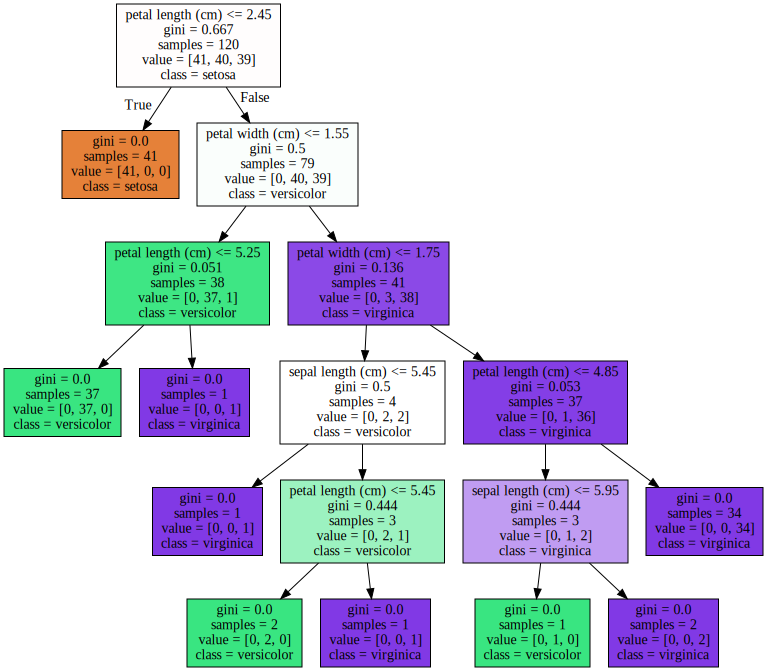

In [ ]:
import graphviz
# 위에서 생성된 tree.dot 파일을 Graphviz가 읽어서 주피터 노트북상에서 시각화
with open("tree.dot") as f:
  dot_graph = f.read()

graphviz.Source(dot_graph)

먼저 더 이상 자식 노드가 없는 노드는 리프 노드이다. 리프 노드는 최종 클래스(레이블) 값이 결정되는 노드이다. 리프 노드가 되려면 오직 하나의 클래스 값으로 최종 데이터가 구성되거나 리프 노드가 될 수 있는 하이퍼 파라미터 조건을 충족하면 된다.

자식 노드가 있는 노드는 브랜치 노드이며 자식 노드를 만들기 위한 분할 규칙 조건을 가지고 있다. 위 그림에서 노드 내 기술된 지표의 의미는 다음과 같다.
* petal length(cm) <= 2.45 와 같이 피처의 조건이 있는 것은 자식 노드를 만들기 위한 규칙 조건이다. 이 조건이 없으면 리프 노드이다.
* gini는 다음의 value=[ ]로 주어진 데이터 분포에서의 지니 계수이다. (낮을 수록 데이터 균일도가 높은 것으로 해석해, 지나 계수가 낮은 속성을 기준으로 분할)
* samples는 현 규칙에 해당하는 데이터 건수이다.
* value = [ ]는 클래스 값 기반의 데이터 건수이다. 붓꽃 데이터 세트에서 만일 value = [41, 40, 39]라면 클래스 값의 순서로 Setosa 41개, Vesicolor 40개, Virginica 39개로 데이터가 구성돼 있다는 의미이다.

색깔이 짙어질수록 지니 계수가 낮고 해당 레이블에 속하는 샘플 데이터가 많다는 의미이다.

결정 트리는 규칙 생성 로직을 미리 제어하지 않으면 완벽하게 클래스 값을 구별해내기 위해 트리 노드를 계속해서 만들어 간다. 이로 인해 결국 매우 복잡한 규칙 트리가 만들어져 모델이 쉽게 과적합되는 문제점을 가지게 된다. 결정 트리는 이러한 이유로 과적합이 상당히 높은 ML 알고리즘이다. 이 때문에 결정트리 알고리즘을 제어하는 대부분 하이퍼 파라미터는 복잡한 트리가 생성되는 것을 막기 위한 용도이다.

사이킷런은 결정 트리 알고리즘이 학습을 통해 규칙을 정하는 데 있어 피처의 중요한 역할 지표를 DecisionTreeClassifier 객체의 **feature_importances_** 속성으로 제공한다.

feature_importances_는 ndarray 형태로 값을 반환하며 피처 순서대로 값이 할당된다. 값이 높을수록 해당 피처의 중요도가 높다는 의미이다.

위의 예제에서 fit( )으로 학습된 DecisionTreeClassifier 객체 변수인 df_clf에서 feature_importances_ 속성을 가져와 피처별로 중요도 값을 매핑하고 이를 막대그래프로 표현해보도록 한다.

Feature importance:
[0.025 0.    0.555 0.42 ]
sepal length (cm) : 0.025
sepal width (cm) : 0.000
petal length (cm) : 0.555
petal width (cm) : 0.420


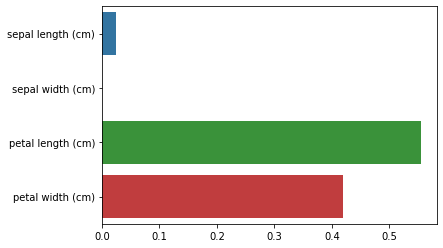

In [ ]:
import seaborn as sns
import numpy as np
%matplotlib inline

# feature importance 추출
print("Feature importance:\n{0}".format(np.round(dt_clf.feature_importances_, 3)))

# feature별 importance 매핑
for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_):
  print('{0} : {1:.3f}'.format(name, value))

# feature importance를 column 별로 시각화하기
sns.barplot(x=dt_clf.feature_importances_, y=iris_data.feature_names)

## 4) 결정 트리 과적합(Overfitting)

결정 트리가 어떻게 학습 데이터를 분할해 예측을 수행하는지와 이로 인한 과적합 문제를 시각화해 알아보도록 한다.

사이킷런은 분류를 위한 테스트용 데이터를 쉽게 만들 수 있도록 **make_classification( )** 함수를 제공한다.

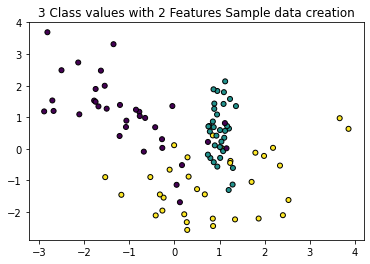

In [ ]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

plt.title("3 Class values with 2 Features Sample data creation")

# 2차원 시각화를 위해서 피처는 2개, 클래스는 3가지 유형의 분류 샘플 데이터 생성.
X_features, y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2,
                                           n_classes=3, n_clusters_per_class=1, random_state=0)

# 그래프 형태로 2개의 피처로 2차원 좌표 시각화, 각 클래스 값은 다른 색깔로 표시됨.
plt.scatter(X_features[:, 0], X_features[:, 1], marker='o', c=y_labels, s=25, edgecolor='k')

X_features와 y_labels 데이터 세트를 기반으로 결정 트리를 학습한다. 첫 번째 학습 시에는 결정 트리 생성에 별다른 제약이 없도록 결정 트리의 하이퍼 파라미터를 디폴트로 한 뒤, 결정 트리 모델이 어떠한 결정 기준을 가지고 분할하면서 데이터를 분류하는지 확인하도록 한다.

이를 위해 별도의 함수인 **visualize_boundary( )**를 생성한다. 해당 함수는 머신러닝 모델이 클래스 값을 예측하는 결정 기준을 색상과 경계로 나타내 모델이 어떻게 데이터 세트를 예측 분류하는지 잘 이해할 수 있게 해준다.

In [ ]:
import numpy as np

# Classifier 의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
  flg, ax = plt.subplots()

  # 학습 데이터 scatter plot으로 나타내기
  ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k', clim=(y.min(), y.max()), zorder=3)
  ax.axis('tight')
  ax.axis('off')
  xlim_start , xlim_end = ax.get_xlim()
  ylim_start , ylim_end = ax.get_ylim()

  # 호출 파라미터로 들어온 training 데이터로 model 학습
  model.fit(X, y)

  # meshgrid 형태인 모든 좌표값으로 예측 수행.
  xx, yy = np.meshgrid(np.linspace(xlim_start, xlim_end, num=200), np.linspace(ylim_start, ylim_end, num=200))
  Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

  # contour() 를 이용하여 class boundary 를 visualization 수행.
  n_classes = len(np.unique(y))
  contours = ax.contourf(xx, yy, Z, alpha=0.3,
                         levels=np.arange(n_classes + 1) - 0.5,
                         cmap = 'rainbow', clim=(y.min(), y.max()), zorder=1)

결정 트리 생성에 별다른 제약이 없도록 하이퍼 파라미터가 디폴트인 Classifier를 학습하고 결정 기준 경계를 시각화하도록 한다.

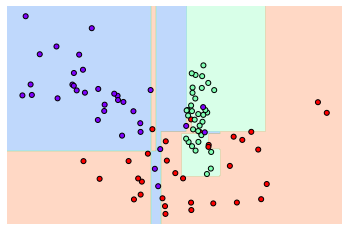

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# 특정한 트리 생성 제약 없는 결정 트리의 학습과 결정 경계 시각화.
dt_clf = DecisionTreeClassifier().fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

일부 이상치(Outlier) 데이터까찌 분류하기 위해 분할이 자주 일어나서 결정 기준 경계가 매우 많아졌다. 결정 트리의 기본 하이퍼 파라미터 설정은 리프 노드 안에 데이터가 모두 균일하거나 하나만 존재해야 하는 엄격한 분할 기준으로 인해 결정 기준 경계가 많아지고 복잡해졌다.

이번엔 min_samples_leaf = 6을 설정해 6개 이하의 데이터는 리프 노드를 생성할 수 있도록 리프 노드 생성 규칙을 완화한 뒤 하이퍼 파라미터를 변경해 어떻게 결정 기준 경계까 변하는지 살펴보도록 한다.

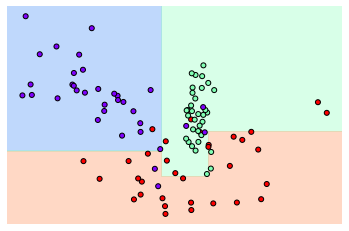

In [ ]:
# min_samples_leaf = 6으로 트리 생성 조건을 제약한 결정 경계 시각화
dt_clf = DecisionTreeClassifier(min_samples_leaf=6).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

이상치에 크게 반응하지 않으면서 좀 더 일반화된 분류 규칙에 따라 분류됐음을 알 수 있다.

## 5) 결정 트리 실습 - 사용자 행동 인식 데이터 세트



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# features.txt 파일에는 피처 이름 index와 피처명이 공백으로 분리되어 있음. 이를 DataFrame으로 로드.
feature_name_df = pd.read_csv('/content/drive/MyDrive/데이터분석/파이썬머신러닝완벽가이드/human_activity/features.txt', sep='\s+',
                              header=None, names=['column_index', 'column_name'])

# 피처명 index를 제거하고, 피처명만 리스트 객체로 생성한 뒤 샘플로 10개만 추출
feature_name = feature_name_df.iloc[:,1].values.tolist()
print('전체 피처명에서 10개만 추출:', feature_name[:10])

전체 피처명에서 10개만 추출: ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X']


피처명을 보면 인체의 움직임과 관련된 속성의 평균/표준편차가 X, Y, Z축 값으로 돼 있음을 유추할 수 있다.

위에서 피처명을 가지고 있는 feature.txt 파일은 중복된 피처명을 가지고 있다. 따라서 중복된 피처명에 대해서 원본 피처명에 _1 또는 _2 를 추가로 부여해 변경한 뒤 이를 이용해 데이터를 DataFrame에 로드하도록 한다.

먼저 중복된 피처명이 얼마나 있는지 확인하도록 한다.

In [ ]:
# 중복된 피처명이 얼마나 있는지 확인
feature_dup_df = feature_name_df.groupby('column_name').count()
print(feature_dup_df[feature_dup_df['column_index']> 1].count())
feature_dup_df[feature_dup_df['column_index']> 1].head()

column_index    42
dtype: int64


,column_index
column_name,
"fBodyAcc-bandsEnergy()-1,16",3
"fBodyAcc-bandsEnergy()-1,24",3
"fBodyAcc-bandsEnergy()-1,8",3
"fBodyAcc-bandsEnergy()-17,24",3
"fBodyAcc-bandsEnergy()-17,32",3


총 42개의 피처명이 중복되어 있다. 이 중복된 피처명에 대해서는 원본 피처명에 _1 또는 _2를 추가로 부여해 새로운 피처명을 가지는 DataFrame을 반환하는 함수인 get_new_feature_name_df( )를 생성한다.

In [ ]:
def get_new_feature_name_df(old_feature_name_df):
  feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(),
                                columns = ['dup_cnt']) # cumcount()는 같은 그룹(같은 이름의 피처)에 대해서 순차적으로 번호를 부여하는 함수
  feature_dup_df = feature_dup_df.reset_index()
  new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how = 'outer')
  new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1])
  if x[1]>0 else x[0], axis=1)
  new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
  return new_feature_name_df

이제 train 디렉터리에 있는 학습용 피처 데이터 세트와 레이블 데이터 세트, test 디렉터리에 있는 테스트용 피처 데이터 파일과 레이블 데이터 파일을 각각 학습/테스트용 DataFrame에 로드하겠습니다. 각 데이터 파일은 공백으로 분리돼 있으므로 read_csv()의 sep 인자로 공백 문자를 입력한다. 레이블의 칼럼은 'action'으로 명명한다.

해당 데이터 세트는 이후 다른 예제에서도 자주 사용되므로 이 DataFrame을 생성하는 로직을 간단한 함수로 생성한다. 함수명은 get_human_datset()으로, 앞에서 생성한 get_new_feature_name_df()는 get_human_dataset() 내에서 적용돼 중복된 피처명을 새로운 피처명으로 할당한다.

In [ ]:
import pandas as pd

def get_human_dataset():

  # 각 데이터 파일은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당한다.
  feature_name_df = pd.read_csv('/content/drive/MyDrive/데이터분석/파이썬머신러닝완벽가이드/human_activity/features.txt', sep='\s+',
                                header=None, names=['column_index', 'column_name'])
  
  # 중복된 피처명을 수정하는 get_new_feature_name_df() 를 이용, 신규 피처명 DataFrame 생성.
  new_feature_name_df = get_new_feature_name_df(feature_name_df)

  # DataFrame에 피처명을 칼럼으로 부여하기 위해 리스트 객체로 다시 변환
  feature_name = new_feature_name_df.iloc[:, 1].values.tolist()
  print('feature_name :', feature_name)

  # 학습 피처 데이터세트와 테스트 피처 데이터를 DataFrame으로 로딩, 칼럼명은 feature_name 적용
  X_train = pd.read_csv('/content/drive/MyDrive/데이터분석/파이썬머신러닝완벽가이드/human_activity/train/X_train.txt', sep='\s+', names=feature_name)
  X_test = pd.read_csv('/content/drive/MyDrive/데이터분석/파이썬머신러닝완벽가이드/human_activity/test/X_test.txt', sep='\s+', names=feature_name)

  # 학습 레이블과 테스트 레이블 데이터를 DataFrame으로 로딩하고 칼럼명은 action으로 부여
  y_train = pd.read_csv('/content/drive/MyDrive/데이터분석/파이썬머신러닝완벽가이드/human_activity/train/y_train.txt', sep='\s+', header=None, names=['action'])
  y_test = pd.read_csv('/content/drive/MyDrive/데이터분석/파이썬머신러닝완벽가이드/human_activity/test/y_test.txt', sep='\s+', header=None, names=['action'])

  # 로드된 학습/테스트용 DataFrame을 모두 반환
  return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_human_dataset()

feature_name : ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X', 'tBodyAcc-max()-Y', 'tBodyAcc-max()-Z', 'tBodyAcc-min()-X', 'tBodyAcc-min()-Y', 'tBodyAcc-min()-Z', 'tBodyAcc-sma()', 'tBodyAcc-energy()-X', 'tBodyAcc-energy()-Y', 'tBodyAcc-energy()-Z', 'tBodyAcc-iqr()-X', 'tBodyAcc-iqr()-Y', 'tBodyAcc-iqr()-Z', 'tBodyAcc-entropy()-X', 'tBodyAcc-entropy()-Y', 'tBodyAcc-entropy()-Z', 'tBodyAcc-arCoeff()-X,1', 'tBodyAcc-arCoeff()-X,2', 'tBodyAcc-arCoeff()-X,3', 'tBodyAcc-arCoeff()-X,4', 'tBodyAcc-arCoeff()-Y,1', 'tBodyAcc-arCoeff()-Y,2', 'tBodyAcc-arCoeff()-Y,3', 'tBodyAcc-arCoeff()-Y,4', 'tBodyAcc-arCoeff()-Z,1', 'tBodyAcc-arCoeff()-Z,2', 'tBodyAcc-arCoeff()-Z,3', 'tBodyAcc-arCoeff()-Z,4', 'tBodyAcc-correlation()-X,Y', 'tBodyAcc-correlation()-X,Z', 'tBodyAcc-correlation()-Y,Z', 'tGravityAcc-mean()-X', 'tGravityAcc-mean()-Y', 'tGravityAcc

In [ ]:
# 로드한 학습용 피처 데이터 세트 간략히 살펴보기
print('## 학습 피처 데이터셋 info()')
print(X_train.info())

## 학습 피처 데이터셋 info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB
None


In [ ]:
# 레이블 값 확인
print(y_train['action'].value_counts())


6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: action, dtype: int64


In [ ]:
# 사이킷런의 DecisionTreeClassifier를 이용해 동작 예측 분류 수행
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 예제 반복 시마다 동일한 예측 결과 도출을 위해 random_state 설정
dt_clf = DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('결정 트리 예측 정확도: {0:.4f}'.format(accuracy))

# DecisionTreeClassifier의 하이퍼 파라미터 추출
print('DecisionTreeClassifier 기본 하이퍼 파라미터:\n', dt_clf.get_params())

결정 트리 예측 정확도: 0.8548
DecisionTreeClassifier 기본 하이퍼 파라미터:
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': 156, 'splitter': 'best'}


이번엔 결정 트리의 트리 깊이(Tree Depth)가 예측 정확도에 주는 영향을 살펴본다. 결정 트리의 경우 분류를 위해 리프 노드(클래스 결정 노드)가 될 수 있는 적합한 수준이 될 때까지 지속해서 트리의 분할을 수행하면서 깊이가 깊어진다.

다음은 GridSearchCV를 이용해 사이킷런 결정 트리의 깊이를 조절할 수 있는 하이퍼 파라미터인 max_depth 값을 변화시키면서 예측 성능을 확인한다.

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth' : [6, 8, 10, 12, 16, 20, 24]
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring ='accuracy', cv=5, verbose=1)
grid_cv.fit(X_train, y_train)
print('GridSearchCV 최고 평균 정확도 수치: {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:  1.8min finished


GridSearchCV 최고 평균 정확도 수치: 0.8513
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 16}


이 예제의 수행 목표는 max_depth 값의 증가에 따라 예측 성능이 어떻게 변했는지 확인하는 것이 우선이다. 5개의 cv 세트에서 max_depth 값에 따라 어떻게 예측 성능이 변했는지 GridSearchCV 객체의 cv_result_ 속성을 통해 살펴보도록 한다 GridSearchCV 객체의 **cv_results_** 속성은 CV세트에 하이퍼 파라미터를 순차적으로 입력했을 때의 성능 수치를 가지고 있다.

In [ ]:
# GridSearchCV 객체의 cv_results_ 속성을 DataFrame으로 생성.
cv_results_df = pd.DataFrame(grid_cv.cv_results_)

# max_depth 파라미터 값과 그때의 테스트 세트, 학습 데이터 세트의 정확도 수치 추출
cv_results_df[['param_max_depth', 'mean_test_score']]

,param_max_depth,mean_test_score
0,6,0.850791
1,8,0.851069
2,10,0.851209
3,12,0.844135
4,16,0.851344
5,20,0.850800
6,24,0.849440


결정 트리는 더 완벽한 규칙을 학습 데이터 세트에 적용하기 위해 노드를 지속적으로 분할하면서 깊이가 깊어지고 더욱 더 복잡한 모델이 된다. 깊어진 트리는 학습 데이터 세트에는 올바른 예측 결과를 가져올지 모르지만, 검증 데이터 세트에서는 오히려 과적합으로 인한 성능 저하를 유발할 수 있다.

이번에는 별도의 테스트 데이터 세트에서 결정 트리의 정확도를 측정하도록 한다.

In [ ]:
max_depths = [6, 8, 10, 12, 16, 20, 24]
# max_depth 값을 변화시키면서 그때마다 학습과 테스트 세트에서의 예측 성능 측정
for depth in max_depths:
  dt_clf = DecisionTreeClassifier(max_depth=depth, random_state=156)
  dt_clf.fit(X_train, y_train)
  pred = dt_clf.predict(X_test)
  accuracy = accuracy_score(y_test, pred)
  print('max_depth = {0} 정확도: {1:.4f}'.format(depth, accuracy))

max_depth = 6 정확도: 0.8558
max_depth = 8 정확도: 0.8707
max_depth = 10 정확도: 0.8673
max_depth = 12 정확도: 0.8646
max_depth = 16 정확도: 0.8575
max_depth = 20 정확도: 0.8548
max_depth = 24 정확도: 0.8548


이처럼 결정 트리는 깊이가 깊어질수록 과적합의 영향력이 커지므로 하이퍼 파라미터를 이용해 깊이를 제어할 수 있어야 한다.

In [ ]:
params = {
    'max_depth' : [8, 12, 16, 20],
    'min_samples_split' : [16, 24]
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1)
grid_cv.fit(X_train, y_train)
print('GridSearchCV 최고 평균 정확도 수치: {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:  2.2min finished


GridSearchCV 최고 평균 정확도 수치: 0.8549
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 8, 'min_samples_split': 16}


앞 예제의 GridSearchCV 객체인 grid_cv의 속성인 best_estimator_는 최적 하이퍼 파라미터인 max_depth 8, min_samples_split 16으로 학습된 Estimator 객체이다. 이를 이용해 테스트 데이터 세트에 예측을 수행하도록 한다.

In [ ]:
best_df_clf = grid_cv.best_estimator_
pred1 = best_df_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred1)
print('결정 트리 예측 정확도:{0:.4f}'.format(accuracy))

결정 트리 예측 정확도:0.8717


마지막으로 결정 트리에서 각 피처의 중요도를 **feature_importances_** 속성을 이용해 알아보도록 한다. 중요도가 높은 순으로 Top 20 피처를 막대그래프로 표현한다.

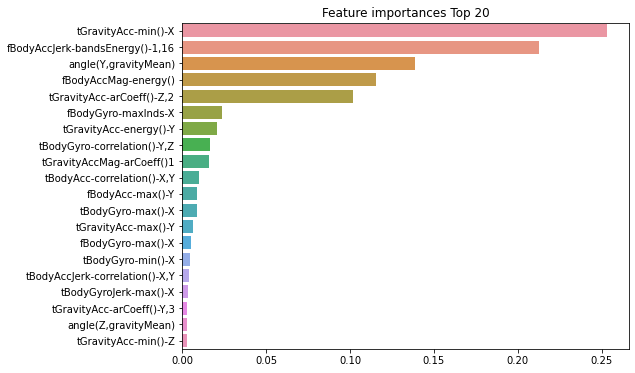

In [ ]:
import seaborn as sns

ftr_importance_values = best_df_clf.feature_importances_

# Top 중요도로 정렬을 쉽게하고, 시본(Seaborn)의 막대그래프로 쉽게 표현하기 위해 Series 변환
ftr_importances = pd.Series(ftr_importance_values, index=X_train.columns)

# 중요도값 순으로 Series를 정렬
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8, 6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

# 3. 앙상블 학습

## 1) 앙상블 학습 개요

**앙상블 학습(Ensemble Learning)**을 통한 분류는 여러 개의 분류기(Classifier)를 생성하고 그 예측을 결합함으로써 보다 정확한 최종 예측을 도출하는 기법을 말한다.

앙상블 학습 유형은 전통적으로 보팅(Voting), 배깅(Bagging), 부스팅(Boosting)의 세 가지로 나뉘며, 이외에도 스태깅을 포함한 다양한 앙상블 방법이 있다.

보팅과 배깅은 여러 개의 분류기가 투표를 통해 최종 예측 결과를 결정하는 방식이다. 보팅과 배깅의 다른 점은 **보팅**의 경우 일반적으로 서로 다른 알고리즘을 가진 분류기가 결합하는 것이고, **배깅**의 경우 각각의 분류기가 모두 같은 유형의 알고리즘 기반이지만, 데이터 샘플링을 서로 다르게 가져가면서 학습을 수행해 보팅을 수행하는 것이다. 대표적인 배깅 방식이 랜덤 포레스트 알고리즘이다.

개별 Classifier에게 데이터를 샘플링해서 추출하는 방식을 **부트스트래핑(Bootstrapping) 분할 방식**이라고 부른다. 개별 분류기가 부트스트래핑 방식으로 샘플링된 데이터 세트에 대해서 학습을 통해 개별적인 예측을 수행한 결과를 보팅을 통해서 최종 예측 결과를 선정하는 방식이 바로 **배깅 앙상블** 방식이다. 교차 검증이 데이터 세트 간에 중첩을 허용하지 않는 것과 다르게 배깅 방식은 중첩을 허용한다.

**부스팅**은 여러 개의 분류기가 순차적으로 학습을 수행하되, 앞에서 학습한 분류기가 예측이 틀린 데이터에 대해서는 올바르게 예측할 수 있도록 다음 분류기에게는 가중치(weight)를 부여하면서 학습과 예측을 진행하는 것이다.

**스태깅**은 여러 가지 다른 모델의 예측 결괏값을 다시 학습 데이터로 만들어서 다른 모델(메타 모델)로 재학습시켜 결과를 예측하는 방법이다.

## 2) 보팅 유형 - 하드 보팅(Hard Voting)과 소프트 보팅(Soft Voting)

**하드 보팅**을 이용한 분류는 다수결 원칙과 비슷하다. 예측한 결괏값들중 다수의 분류기가 결정한 예측값을 최종 보팅 결괏값으로 선정하는 것이다.

**소프트 보팅**은 분류기들의 레이블 값 결정 확률을 모두 더하고 이를 평균해서 이들 중 확률이 가장 높은 레이블 값을 최종 보팅 결괏값으로 선정한다. 일반적으로 소프트 보팅이 보팅 방법으로 적용된다.

## 3) 보팅 분류기(Voting Classifier)

사이킷런은 보팅 방식의 앙상블을 구현한 **VotingClassifier** 클래스를 제공한다.

보팅 방식의 앙상블을 이용해 위스콘신 유방암 데이터 세트를 예측 분석해 보겠습니다. 사이킷런은 **load_breast_cancer( )** 함수를 통해 자체에서 위스콘신 유방암 데이터 세트를 생성할 수 있다.

로지스틱 회귀와 KNN 기반으로 보팅 분류기를 만들어 보도록 한다.

In [ ]:
# 필요한 모듈과 데이터를 로딩한 후 데이터를 간략히 살펴본다.
import pandas as pd

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer = load_breast_cancer()

data_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
data_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


로지스틱 회귀와 KNN을 기반으로 하여 소프트 보팅 방식으로 새롭게 보팅 분류기를 만들어보도록 한다.

**VotingClassifier 클래스**는 주요 생성 인자로 estimators와 voting 값을 입력 받으며 voting은 'hard' 시 하드 보팅, 'soft' 시 소프트 보팅 방식을 적용하라는 의미이다. (디폴트는 'hard')

In [ ]:
# 개별 모델은 로지스틱 회귀와 KNN이다.
lr_clf = LogisticRegression()
knn_clf = KNeighborsClassifier(n_neighbors=8)

# 개별 모델을 소프트 보팅 기반의 앙상블 모델로 구현한 분류기
vo_clf = VotingClassifier( estimators=[('LR', lr_clf), ('KNN', knn_clf)], voting='soft')

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=156)

# VotingClassifier 학습/예측/평가.
vo_clf.fit(X_train, y_train)
pred = vo_clf.predict(X_test)
print('Voting 분류기 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

# 개별 모델의 학습/예측/평가.
classifiers = [lr_clf, knn_clf]
for classifier in classifiers:
  classifier.fit(X_train, y_train)
  pred = classifier.predict(X_test)
  class_name = classifier.__class__.__name__
  print('{0} 정확도: {1:.4f}'.format(class_name, accuracy_score(y_test, pred)))

Voting 분류기 정확도: 0.9474
LogisticRegression 정확도: 0.9386
KNeighborsClassifier 정확도: 0.9386


보팅 분류기의 정확도가 조금 높게 나왔는데, 보팅으로 여러 개의 기반 분류기를 결합한다고 하여 무조건 기반 분류기보다 예측 성능이 향상되지는 않는다.

그럼에도 불구하고 지금 소개하는 보팅을 포함해 배깅과 부스팅 등의 앙상블 방법은 전반적으로 다른 단일 ML 알고리즘보다 뛰어난 예측 성능을 가지는 경우가 많다. 고정된 데이터 세트에서 단일 ML 알고리즘이 뛰어난 성능을 발휘하더라도 현실 세계는 다양한 변수와 예측이 어려운 규칙으로 구성되어있다. 다양한 관점을 가진 알고리즘이 서로 결합해 더 나은 성능을 실제 환경에서 끌어낼 수 있다.

# 4. 랜덤 포레스트



## 1) 랜덤 포레스트의 개요 및 실습

**배깅(bagging)**은 보팅과 다르게, 같은 알고리즘으로 여러 개의 분류기를 만들어서 보팅으로 최종 결정하는 알고리즘이다.

**랜덤 포레스트**는 여러 개의 결정 트리 분류가 전체 데이터에서 배깅 방식으로 각자의 데이터를 샘플링해 개별적으로 학습을 수행한 뒤 최종적으로 모든 분류기가 보팅을 통해 예측 결정을 하게 된다.

랜덤 포레스트는 개별적인 분류기의 기반 알고리즘은 결정 트리이지만 개별 트리가 학습하는 데이터 세트는 전체 데이터에서 일부가 중첩되게 샘플링된 데이터 세트이다. 이렇게 여러 개의 데이터 세트를 중첩되게 분리하는 것을 부트스트래핑(bootstrapping) 분할 방식이라고 한다(그래서 배깅 (Bagging)이 bootstrap aggregating의 줄임말이다). 서브세트의 데이터 건수는 전체 데이터 건수와 동일하지만, 개별 데이터가 중첩되게 만들어진다.

데이터가 중첩된 개별 데이터 세트에 결정 트리 분류기를 각각 적용하는 것이 랜덤 포레스트이다.

사이킷런은 **RandomForestClassifier 클래스**를 통해 랜덤 포레스트 기반의 분류를 지원한다.

앞의 사용자 행동 인식 데이터 세트를 RandomForestClassifier를 이용해 예측해 보도록 한다.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# 결정 트리에서 사용한 get_human_dataset( )를 이용해 학습/테스트용 DataFrame 반환
X_train, X_test, y_train, y_test = get_human_dataset()

# 랜덤 포레스트 학습 및 별도의 테스트 세트로 예측 성능 평가
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy))

feature_name : ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X', 'tBodyAcc-max()-Y', 'tBodyAcc-max()-Z', 'tBodyAcc-min()-X', 'tBodyAcc-min()-Y', 'tBodyAcc-min()-Z', 'tBodyAcc-sma()', 'tBodyAcc-energy()-X', 'tBodyAcc-energy()-Y', 'tBodyAcc-energy()-Z', 'tBodyAcc-iqr()-X', 'tBodyAcc-iqr()-Y', 'tBodyAcc-iqr()-Z', 'tBodyAcc-entropy()-X', 'tBodyAcc-entropy()-Y', 'tBodyAcc-entropy()-Z', 'tBodyAcc-arCoeff()-X,1', 'tBodyAcc-arCoeff()-X,2', 'tBodyAcc-arCoeff()-X,3', 'tBodyAcc-arCoeff()-X,4', 'tBodyAcc-arCoeff()-Y,1', 'tBodyAcc-arCoeff()-Y,2', 'tBodyAcc-arCoeff()-Y,3', 'tBodyAcc-arCoeff()-Y,4', 'tBodyAcc-arCoeff()-Z,1', 'tBodyAcc-arCoeff()-Z,2', 'tBodyAcc-arCoeff()-Z,3', 'tBodyAcc-arCoeff()-Z,4', 'tBodyAcc-correlation()-X,Y', 'tBodyAcc-correlation()-X,Z', 'tBodyAcc-correlation()-Y,Z', 'tGravityAcc-mean()-X', 'tGravityAcc-mean()-Y', 'tGravityAcc

## 2) 랜덤 포레스트 하이퍼 파라미터 및 튜닝

트리 기반의 앙상블 알고리즘의 단점을 굳이 뽑자면 하이퍼 파라미터가 너무 많고, 그로 인해 튜닝을 위한 시간이 많이 소모된다는 점이다.

그나마 랜덤 포레스트가 적은 편에 속하는데, 결정 트리에서 사용되는 하이퍼 파라미터와 같은 파라미터가 대부분이기 때문이다.

* **n_estimators** : 랜덤 포레스트에서 결정 트리의 개수를 지정한다. 디폴트는 10개. 많이 설정할수록 좋은 성능을 기대할 수 있지만 계속 증가시킨다고 성능이 무조건 향상되는 것은 아님. 또한 늘릴수록 학습 수행 시간이 오래 걸린다.

* **max_features** : 최적의 분할을 위해 고려할 최대 피처의 개수를 지정하는 것으로 결정 트리에 사용된 max_fearues 파라미터와 같다. 하지만 RandomForestClassifier의 기본 max_features는 'None'이 아니라 'auto', 즉 'sqrt'와 같다. 

* **max_depth**나 **min_samples_leaf**와 같이 결정 트리에서 과적합을 개선하기 위해 사용되는 파라미터가 랜덤 포레스트에도 똑같이 적용될 수 있다.


GridSearchCV를 이용해 랜덤 포레스트의 하이퍼 파라미터를 튜닝하도록 한다.

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators': [100],
    'max_depth' : [6, 8, 10],
    'min_samples_leaf' : [8, 12],
    'min_samples_split' : [8, 16]
}

# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(random_state=0)
gird_cv = GridSearchCV(rf_clf, param_grid=params, cv=2)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터:\n',grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:  2.2min finished


최적 하이퍼 파라미터:
 {'max_depth': 8, 'min_samples_split': 16}
최고 예측 정확도: 0.8549


n_estimators를 300으로 증가시키고, 최적화 하이퍼 파라미터로 다시 RandomForestClassifier를 학습시킨 뒤에 이번에는 별도의 테스트 데이터 세트에서 예측 성능을 측정해 보도록 한다.

In [ ]:
rf_clf1 = RandomForestClassifier(n_estimators=300, max_depth=10, min_samples_leaf=8, \
                                 min_samples_split=8, random_state=0)
rf_clf1.fit(X_train, y_train)
pred= rf_clf1.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

예측 정확도: 0.9165


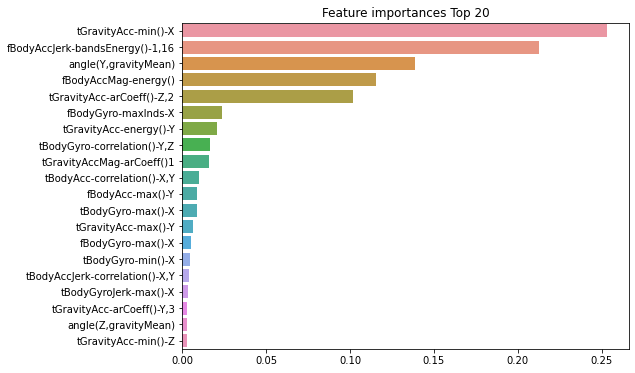

In [ ]:
# feature_importances_ 속성을 이용해 알고리즘이 선택한 피처의 중요도를 시각화하도록 한다.

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importance_values, index=X_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8, 6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20, y = ftr_top20.index)
plt.show()

# 5. GBM(Gradient Boosting Machine)


## 1) GBM의 개요 및 실습

**부스팅 알고리즘**은 여러 개의 약한 학습기(weak learner)를 순차적으로 학습-예측하면서 잘못 예측한 데이터에 가중치 부여를 통해 오류를 개선해 나가면서 학습하는 방식입니다. 부스팅의 대표적인 구현은 AdaBoost(Adaptive boosting)와 그래디언트 부스트가 있다.

**에이다 부스트(AdaBoost)**는 오류 데이터에 가중치를 부여하면서 부스팅을 수행하는 대표적인 알고리즘이다.

**GBM(Gradient Boost Machine)**도 에이다부스트와 유사하나, 가중치 업데이트를 경사 하강법(Gradient Descent)을 이용하는 것이 큰 차이이다. 오류 값은 실제 값 - 예측값이다. 분류의 실제 결괏값을 y, 피처를 x1, x2, ... , xn, 그리고 이 피처에 기반한 예측 함수를 F(x) 함수라고 하면 오류식 h(x) = y - F(x)이 된다. 이 오류식 h(x) = y - F(x)를 최소화하는 방향성을 가지고 반복적으로 가중치 값을 업데이트하는 것이 **경사 하강법(Gradient Descent)**이다. 이 경사 하강법의 핵심은 '반복 수행을 통해 오류를 최소화할 수 있도록 가중치의 업데이트 값을 도출하는 기법'이다.

사이킷런은 GBM 기반의 분류를 위해서 **GradientBoostingClassifier** 클래스를 제공한다.

In [ ]:
'''
from sklearn.ensemble import GradientBoostingClassifier
import time
import warnings
warnings.filterwarnings('ignore')

X_train, X_test, y_train, y_test = get_human_dataset()

# GBM 수행 시간 측정을 위함. 시작 시간 설정.
start_time = time.time()

gb_clf = GradientBoostingClassifier(random_state=0)
gb_clf.fit(X_train, y_train)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

print('GBM 정확도: {0:.4f}'.format(gb_accuracy))
print('GBM 수행 시간: {0:.1f} 초'.fomrat(time.time() - strat_time))
'''

"\nfrom sklearn.ensemble import GradientBoostingClassifier\nimport time\nimport warnings\nwarnings.filterwarnings('ignore')\n\nX_train, X_test, y_train, y_test = get_human_dataset()\n\n# GBM 수행 시간 측정을 위함. 시작 시간 설정.\nstart_time = time.time()\n\ngb_clf = GradientBoostingClassifier(random_state=0)\ngb_clf.fit(X_train, y_train)\ngb_pred = gb_clf.predict(X_test)\ngb_accuracy = accuracy_score(y_test, gb_pred)\n\nprint('GBM 정확도: {0:.4f}'.format(gb_accuracy))\nprint('GBM 수행 시간: {0:.1f} 초'.fomrat(time.time() - strat_time))\n"

일반적으로 GBM이 랜덤 포레스트보다는 예측 성능이 조금 뛰어난 경우가 많다. 그러나 수행 시간이 오래 걸리고, 하이퍼 파라미터 튜닝 노력도 더 필요하다.

## 2) GBM 하이퍼 파라미터 및 튜닝

n_estimators, max_depth, max_features와 같은 트리 기반 자체의 파라미터는 결정 트리, 랜덤 포레스트에서 이미 많이 소개했으므로 생략한다.
* **loss**: 경사 하강법에서 사용할 비용 함수를 지정한다. 특별한 이유가 없으면 기본값인 'deviance'를 그대로 적용한다.

* **learning_rate**: GBM이 학습을 진행할 때마다 적용하는 학습률이다. Weak learner가 순차적으로 오류 값을 보정해 나가는 데 적용하는 계수이다. 0~1 사이 값을 지정할 수 있으며 기본값은 0.1이다. 너무 작은 값을 적용하면 업데이트 되는 값이 작아져 최소 오류 값을 찾아 예측 성능이 노아질 가능성이 높다. 하지만 많은 weak learner는 순차적인 반복이 필요해서 수행 시간이 오래 걸리고, 또너무 작게 설정하면 모든 weak learner의 반복이 완료돼도 최소 오류 값을 찾지 못할 수 있다. 반대로 큰 값을 적용하면 최소 오류 값을 찾지 못하고 그냥 지나쳐 버려 예측 성능이 떨어질 가능성이 높아지지만, 빠른 수행이 가능하다.

* **n_estimators**: weak learner의 개수이다. weak learner가 순차적으로 오류를 보정하므로 개수가 많을수록 예측 성능이 일정 수준까지 좋아질 수 있다. 하지만 개수가 많을수록 수행 시간이 오래 걸린다. 기본값은 100이다.

* **subsample**: weak learner가 학습에 사용하는 데이터의 샘플링 비율이다. 기본값은 1이며, 이는 전체 학습 데이터를 기반으로 학습한다는 의미이다(0.5이면 학습 데이터의 50%). 과적합이 염려되는 경우 subsample을 1보다 작은 값으로 설정한다.

다음으로 GridSearchCV를 이용해 파라미터를 최적화해보도록 한다. 아마도 사용자 행동 데이터 세트 정도의 데이터 양에 하이퍼 파라미터를 GBM으로 테스트하려면 많은 시간이 걸릴 것이다. 따라서 일단 각주처리를 하도록 한다.

In [ ]:
'''
from sklearn model_selection impor GridSearchCV

params = {
  'n_estimators':[100, 500],
  'learning_rate' : [0.05, 0.1]
}

grid_cv = GridSearchCV(gb_clf, param_grid = params, cv=2, verbose=1)
grid_cv.fit(X_train, y_train)
print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}.format(grid_cv.best_score_))
'''


"\nfrom sklearn model_selection impor GridSearchCV\n\nparams = {\n  'n_estimators':[100, 500],\n  'learning_rate' : [0.05, 0.1]\n}\n\ngrid_cv = GridSearchCV(gb_clf, param_grid = params, cv=2, verbose=1)\ngrid_cv.fit(X_train, y_train)\nprint('최적 하이퍼 파라미터:\n', grid_cv.best_params_)\nprint('최고 예측 정확도: {0:.4f}.format(grid_cv.best_score_))\n"

learning rate가 0.05, n_estimator가 500일 때 2개의 교차 검증 세트에서 90.1% 정확도가 최고로 도출되었다. 이 설정을 그대로 테스트 데이터 세트에 적용해 예측 정확도를 확인한다.

In [ ]:
# GridSearchCV를 이용해 최저으로 학습된 estimator로 예측 수행
'''
gb_pred = grid_cv.best_estimator_predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)
print('GBM 정확도: {0:.4f}.format(gb_accuracy))
'''

"\ngb_pred = grid_cv.best_estimator_predict(X_test)\ngb_accuracy = accuracy_score(y_test, gb_pred)\nprint('GBM 정확도: {0:.4f}.format(gb_accuracy))\n"

테스트 데이터 세트에서 약 94.1%의 정확도를 가진다. GBM은 과적합에도 강한 뛰어난 예측 성능을 가진 알고리즘이다. 하지만 수행 시간이 오래 걸린다는 단점이 있다.

많은 알고리즘이 GBM을 기반으로 새롭게 만들어지고 있다. 이 중 각광을 받고 있는 두 개의 그래디언트 부스팅 기반 ML 패키지는 XGBoost와 LightGBM이다. 먼저 XGBoost를 알아보도록 한다.

# 6. XGBoost(eXtra Gradient Boost)


## 1) XGBoost 개요

XGBoost의 주요 장점으로 다음과 같은 것이 있다.
* 뛰어난 예측 성능
* GBM 대비 빠른 수행 시간
* 과적합 규제 기능
* Tree pruning(나무 가지치기) : XGBoost도 max_depth 파라미터로 분할 깊이를 조정하기도 하지만, tree pruning으로 더 이상 긍정 이득이 없는 분할을 가지치기 해서 분할 수를 더 줄이는 추가적인 장점을 가지고 있다.
* 자체 내장된 교차 검증
* 결손값 자체 처리

XGBoost는 XGBoost 프레임워크 기반의 XGBoost와 사이킷런과 연동되는 모듈이 있다. 사이킷런과 연동되는 모듈을 살펴보도록 한다.

## 2) 사이킷런 래퍼 XGBoost의 개요 및 적용

사이킷런을 위한 래퍼 XGBoost는 크게 분류를 위한 래퍼 클래스인 **XGBClassifier**, 회귀를 위한 래퍼 클래스인 **XGBRegressor**이다.

위스콘신 대학병원의 유방암 데이터 세트를 분류를 위한 래퍼 클래스인 XGBClassifier를 이용해 예측하도록 한다.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

dataset = load_breast_cancer()
X_features = dataset.data
y_label = dataset.target

cancer_df = pd.DataFrame(data=X_features, columns=dataset.feature_names)
cancer_df['target']=y_label
cancer_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0


타겟 레이블 값의 종류는 악성인 'malignant'가 0 값으로, 양성인 'benign'이 1값으로 돼 있다.

In [ ]:
print(dataset.target_names)
print(cancer_df['target'].value_counts())

['malignant' 'benign']
1    357
0    212
Name: target, dtype: int64


In [ ]:
# 전체 데이터 중 80%는 학습용 데이터, 20%는 테스트용 데이터 추출
X_train, X_test, y_train, y_test = train_test_split(X_features, y_label, test_size=0.2, random_state=156)
print(X_train.shape, X_test.shape)

(455, 30) (114, 30)


In [ ]:
# 사이킷런 래퍼 XGBoost 클래스인 XGBClaasifier 임포트
from xgboost import XGBClassifier

xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
xgb_wrapper.fit(X_train, y_train)
w_preds = xgb_wrapper.predict(X_test)
w_pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]

In [ ]:
# get_clf_eval()을 이용해 예측 성능 평가
from sklearn.metrics import accuracy_score, precision_score, recall_score, recall_score, confusion_matrix, roc_auc_score, f1_score

def get_clf_eval(y_test, pred=None, pred_proba=None):
  confusion = confusion_matrix(y_test, pred)
  accuracy = accuracy_score(y_test, pred)
  precision = precision_score(y_test, pred)
  recall = recall_score(y_test, pred)
  f1 = f1_score(y_test, pred)
  # ROC-AUC 추가
  roc_auc = roc_auc_score(y_test, pred_proba)
  print('오차 행렬')
  print(confusion)
  # ROC_AUC print 추가
  print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:4f}, F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))


get_clf_eval(y_test, w_preds, w_pred_proba)

오차 행렬
[[35  2]
 [ 1 76]]
정확도: 0.9737, 정밀도: 0.9744, 재현율: 0.987013, F1: 0.9806, AUC:0.9951


사이킷런 래퍼 XGBoost에서도 조기 중단을 수행할 수 있다. 조기 중단 관련한 파라미터를 fit( )에 입력하면 된다. 조기 중단 관련 파라미터는 평가 지표가 향상될 수 있는 반복 횟수를 정의하는 **early_stopping_rounds**, 조기 중단 위한 평가 지표인 **eval_metric**, 그리고 성능 평가를 수행할 데이터 세트인 **eval_set**이다. 성능 평가를 수행할 데이터 세트는 학습 데이터가 아니라 별도의 데이터 세트여야 한다.

테스트 데이터 세트는 학습 시에는 완전히 알려지지 않은 데이터 세트를 사용해야 한다. 평가에 테스트 데이터 세트를 사용하면 학습 시에 미리 참고가 되어 과적합할 수 있기 때문이다. 단, 이 예제에서는 데이터 세트의 크기가 작아 테스트 데이터를 평가용으로 사용했다.

In [ ]:
from xgboost import XGBClassifier

xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
evals = [(X_test, y_test)]
xgb_wrapper.fit(X_train, y_train, early_stopping_rounds=100, eval_metric='logloss', eval_set=evals, verbose=True)
ws100_preds = xgb_wrapper.predict(X_test)
ws100_pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]

[0]	validation_0-logloss:0.61352
Will train until validation_0-logloss hasn't improved in 100 rounds.
[1]	validation_0-logloss:0.547842
[2]	validation_0-logloss:0.494247
[3]	validation_0-logloss:0.447986
[4]	validation_0-logloss:0.409109
[5]	validation_0-logloss:0.374977
[6]	validation_0-logloss:0.345714
[7]	validation_0-logloss:0.320529
[8]	validation_0-logloss:0.29721
[9]	validation_0-logloss:0.277991
[10]	validation_0-logloss:0.260302
[11]	validation_0-logloss:0.246037
[12]	validation_0-logloss:0.231556
[13]	validation_0-logloss:0.22005
[14]	validation_0-logloss:0.208572
[15]	validation_0-logloss:0.199993
[16]	validation_0-logloss:0.190118
[17]	validation_0-logloss:0.181818
[18]	validation_0-logloss:0.174729
[19]	validation_0-logloss:0.167657
[20]	validation_0-logloss:0.158202
[21]	validation_0-logloss:0.154725
[22]	validation_0-logloss:0.148947
[23]	validation_0-logloss:0.143308
[24]	validation_0-logloss:0.136344
[25]	validation_0-logloss:0.132778
[26]	validation_0-logloss:0.127912

n_estimators를 400으로 설정해도 400번 반복을 수행하지 않고 311번 반복한 후 학습을 완료했음을 알 수 있다. 311번 반복한 후 멈춘 이유는 211번 반복시 logloss가 0.085593이고 311번 반복 시 0.085948인데, 211번에서 311번까지 early_stopping_rounds=100으로 지정된 100번의 반복 동안 성능 평가 지수가 향상되지 않았기 때문에 더 이상 반복하지 않고 멈춘 것이다.

조기 중단으로 학습된 XGBClassifier의 예측 성능을 살펴보겠다. 조기 중단이 적용되지 않은 결과보다 약간 저조한 성능을 나타냈지만, 큰 차이는 아니다.

In [ ]:
get_clf_eval(y_test, ws100_preds, ws100_pred_proba)

오차 행렬
[[34  3]
 [ 1 76]]
정확도: 0.9649, 정밀도: 0.9620, 재현율: 0.987013, F1: 0.9744, AUC:0.9954


하지만 조기 중단값을 너무 급격하게 줄이면 예측 성능이 저하될 우려가 크다. 예를 들어 만일 early_stopping_rounds를 10으로 하면 아직 성능이 향상될 여지가 있음에도 불구하고 10번 반복하는 동안 성능 평가 지표가 향상되지 않으면 반복이 멈춰 버려서 충분한 학습이 되지 않아 예측 성능이 나빠질 수 있다.

In [ ]:
# early_stopping_rounds를 10으로 설정하고 재 학습.
xgb_wrapper.fit(X_train, y_train, early_stopping_rounds=10, eval_metric='logloss', eval_set=evals, verbose=True)

ws10_preds = xgb_wrapper.predict(X_test)
ws10_pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]
get_clf_eval(y_test, ws10_preds, ws10_pred_proba)

[0]	validation_0-logloss:0.61352
Will train until validation_0-logloss hasn't improved in 10 rounds.
[1]	validation_0-logloss:0.547842
[2]	validation_0-logloss:0.494247
[3]	validation_0-logloss:0.447986
[4]	validation_0-logloss:0.409109
[5]	validation_0-logloss:0.374977
[6]	validation_0-logloss:0.345714
[7]	validation_0-logloss:0.320529
[8]	validation_0-logloss:0.29721
[9]	validation_0-logloss:0.277991
[10]	validation_0-logloss:0.260302
[11]	validation_0-logloss:0.246037
[12]	validation_0-logloss:0.231556
[13]	validation_0-logloss:0.22005
[14]	validation_0-logloss:0.208572
[15]	validation_0-logloss:0.199993
[16]	validation_0-logloss:0.190118
[17]	validation_0-logloss:0.181818
[18]	validation_0-logloss:0.174729
[19]	validation_0-logloss:0.167657
[20]	validation_0-logloss:0.158202
[21]	validation_0-logloss:0.154725
[22]	validation_0-logloss:0.148947
[23]	validation_0-logloss:0.143308
[24]	validation_0-logloss:0.136344
[25]	validation_0-logloss:0.132778
[26]	validation_0-logloss:0.127912


피처의 중요도를 시각화하는 모듈인 **plot_importance( )** API에 사이킷런 래퍼 클래스를 입력하면 시각화 결과를 도출할 수 있다.

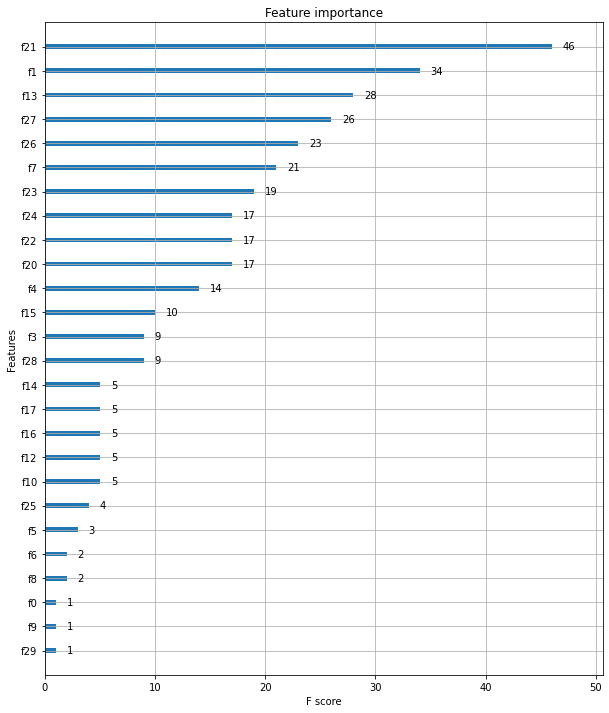

In [ ]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
# 사이킷런 Wrapper 클래스를 입력해도 무방.
plot_importance(xgb_wrapper, ax=ax)

# 7. LightGBM

LightGBM의 가장 큰 장점은 XGBoost보다 학습에 걸리는 시간이 훨씬 적다는 점이다. 또한 메모리 사용량도 상대적으로 적다. 성능상으로도 XGBoost와 별다른 차이가 없다.

LightGBM의 한 가지 단점으로 알려진 것은 적은 데이터 세트에 적용할 경우 과적합이 발생하기 쉽다는 것이다. 적은 데이터의 기준은 애매하지만, 공식 문서에서는 10,000건 이하의 데이터 세트 정도라고 기술한다.

LightGBM은 일반 GBM 계열의 트리 분할 방법과 다르게 리프 중심 트리 분할(Leaf Wise) 방식을 사용한다. 리프 중심 트리 분할 방식은 트리의 균형을 맞추지 않고, 최대 손실 값(max delta loss)을 가지는 리프 노드를 지속적으로 분할하면서 트리의 깊이가 깊어지고 비대칭적인 규칙 트리가 생성된다. 하지만 이렇게 최대 순실값을 가지는 리프 노드를 지속적으로 분할해 생성된 규칙 트리는 학습을 반복할수록 결국은 균형 트리 분할 방식보다 예측 오류 손실을 최소화할 수 있다는 것이 LightGBM의 구현 사상이다.

LightGBM의 XGBoost 대비 장점은 다음과 같이 정리할 수 있다.
* 더 빠른 학습과 예측 수행 시간
* 더 작은 메모리 사용량
* 카테고리형 피처의 자동 변환과 최적 분할(원-핫 인코딩 등을 사용하지 않고도 카테고리형 피처를 최적으로 변환하고 이에 따른 노드 분할 수행).

## 1) LightGBM 하이퍼 파라미터

* **num_iterations** [ default=100] : 반복 수행하려는 트리의 개수를 지정한다. 크게 지정할수록 예측 성능이 높아질 수 있으나, 너무 크게 지정하면 오히려 과적합으로 성능이 저하될 수 있다.

* **learning_rate** [ default= 0.1]: 0에서 1사이의 값을 지정하며 부스팅 스텝을 반복적으로 수행할 때 업데이트되는 학습률 값이다.

* **max_depth** [defalut=-1]: 트리 기반 알고리즘의 max_depth와 같다. 지금까지 소개한 Depth wise 방식의 트리와 다르게 LightGBM은 Leaf wise 기반이므로 깊이가 상대적으로 더 깊다.

* **min_data_in_leaf** [default=20]: 결정 트리의 min_samples_leaf와 같은 파라미터이다. 사이킷런 래퍼 LightGBM 클래스인 LightGBMClassifier에서는 min_child_samples 파라미터로 이름이 변경된다. 최정 결정 클래스인 리프 노드가 되기 위해서 최소한으로 필요한 레코드 수이며, 과적합을 제어하기 위한 파라미터이다.

* **num_leaves** [default=31] : 하나의 트리가 가질 수 있는 최대 리프 개수

* **boosting** [default=gbdt]: 부스팅의 트리를 생성하는 알고리즘을 기술한다.
  * gbdt: 일반적인 그래디언트 부스팅 결정 트리
  * 랜덤 포레스트

* **bagging_fraction** [default=1.0]: 트리가 커져서 과적합되는 것을 제어하기 위해서 데이터를 샘플링하는 비율을 지정한다. 사이킷런 래퍼 LightGBM 클래스인 LightGBMClassifier에서는 subsample로 변경된다.

* **feature_fraction** [default=1.0]: 개별 트리를 학습할 때마다 무작위로 선택하는 피처의 비율이다. 과적합을 막기 위해 사용된다. 사이킷런 래퍼 LightGBM 클래스인 LightGBMClassifier에서는 colsample_bytree로 변경된다.

* **lambda_l2** [default=0.0]: L2 regulation 제어를 위한 값. 사이킷런 래퍼 LightGBM 클래스인 LightGBMClassifier에서는 reg_lambda로 변경된다.

* **lambda_l1** [default=0.0] : L1 regulation 제어를 위한 값. 사이킷런 래퍼 LightGBM 클래스인 LightGBMClassifier에서는 reg_alpha로 변경된다.

* **objective** : 최솟값을 가져야 할 손실함수를 정의한다. 애플리케이션 유형, 즉 회귀, 다중 클래스 분류, 이진 분류인지에 따라서 objective인 손실함수가 지정된다.

## 2) 하이퍼 파라미터 튜닝 방안

num_leaves의 개수를 중심으로 min_child_samples(min_data_in_leaf), max_depth를 함께 조정하면서 모델의 복잡도를 줄이는 것이 기본 튜닝 방안이다.

* **num_leaves**는 개별 트리가 가질 수 있는 최대 리프의 개수이다. 일반적으로 num_leaves의 개수를 높이면 정확도가 높아지지만, 반대로 트리의 깊이가 깊어지고 모델이 복잡도가 커져 과적합 영향도가 커진다.

* **min_data_in_leaf**는 사이킷런 래퍼 클래스에서는 **min_child_samples**로 이름이 바뀐다. num_leaves와 학습 데이터의 크기에 따라 달라지지만, 보통 큰 값으로 설정하면 트리가 깊어지는 것을 방지한다.

* **max_depth**는 명시적으로 깊이의 크기를 제한한다.


learning_rate를 작게 하면서 n_estimators를 크게 하는 것은 부스팅 계열 튜닝에서 가장 기본적인 튜닝 방안이므로 이를 적용하는 것도 좋다.

## 3) LightGBM 적용 - 위스콘신 유방암 예측

LightGBM의 파이썬 패키지인 lightgbm에서 LGBMClassifier를 임포트해 사용한다.

LightGBM도 XGBoost와 동일하게 조기 중단(early stopping)이 가능하다. XGBClassifier와 동일하게 LGBMClassifier의 fit()에 조기 중단 관련 파라미터를 설정해주면 된다.

In [ ]:
# LightGBM의 파이썬 패키지인 lightgbm에서 LGBMClassifier 임포트
from lightgbm import LGBMClassifier

import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

dataset = load_breast_cancer()
ftr = dataset.data
target = dataset.target

# 전체 데이터 중 80%는 학습용 데이터, 20%는 테스트용 데이터 추출
X_train, X_test, y_train, y_test = train_test_split(ftr, target, test_size=0.2, random_state=156)

# 앞서 XGBoost와 동일하게 n_estimators는 400 설정.
lgbm_wrapper = LGBMClassifier(n_estimators=400)

# LightGBM도 XGBoost와 동일하게 조기 중단 수행 가능.
evals = [(X_test, y_test)]
lgbm_wrapper.fit(X_train, y_train, early_stopping_rounds=100, eval_metric='logloss', eval_set=evals, verbose=True)
preds = lgbm_wrapper.predict(X_test)
pred_proba = lgbm_wrapper.predict_proba(X_test)[:, 1]

[1]	valid_0's binary_logloss: 0.565079	valid_0's binary_logloss: 0.565079
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's binary_logloss: 0.507451	valid_0's binary_logloss: 0.507451
[3]	valid_0's binary_logloss: 0.458489	valid_0's binary_logloss: 0.458489
[4]	valid_0's binary_logloss: 0.417481	valid_0's binary_logloss: 0.417481
[5]	valid_0's binary_logloss: 0.385507	valid_0's binary_logloss: 0.385507
[6]	valid_0's binary_logloss: 0.355846	valid_0's binary_logloss: 0.355846
[7]	valid_0's binary_logloss: 0.330897	valid_0's binary_logloss: 0.330897
[8]	valid_0's binary_logloss: 0.306923	valid_0's binary_logloss: 0.306923
[9]	valid_0's binary_logloss: 0.28776	valid_0's binary_logloss: 0.28776
[10]	valid_0's binary_logloss: 0.26917	valid_0's binary_logloss: 0.26917
[11]	valid_0's binary_logloss: 0.250954	valid_0's binary_logloss: 0.250954
[12]	valid_0's binary_logloss: 0.23847	valid_0's binary_logloss: 0.23847
[13]	valid_0's binary_logloss: 0.225865	valid_0's bi

In [ ]:
# 학습된 LightGBM 모델을 기반으로 예측 성능을 평가한다
get_clf_eval(y_test, preds, pred_proba)

오차 행렬
[[33  4]
 [ 2 75]]
정확도: 0.9474, 정밀도: 0.9494, 재현율: 0.974026, F1: 0.9615, AUC:0.9926


LightGBM 파이썬 패키지인 lightgbm도 피처 중요도를 시각화할 수 있는 내장 API를 제공한다. 이름도 동일하게 **plot_importance()**이다.

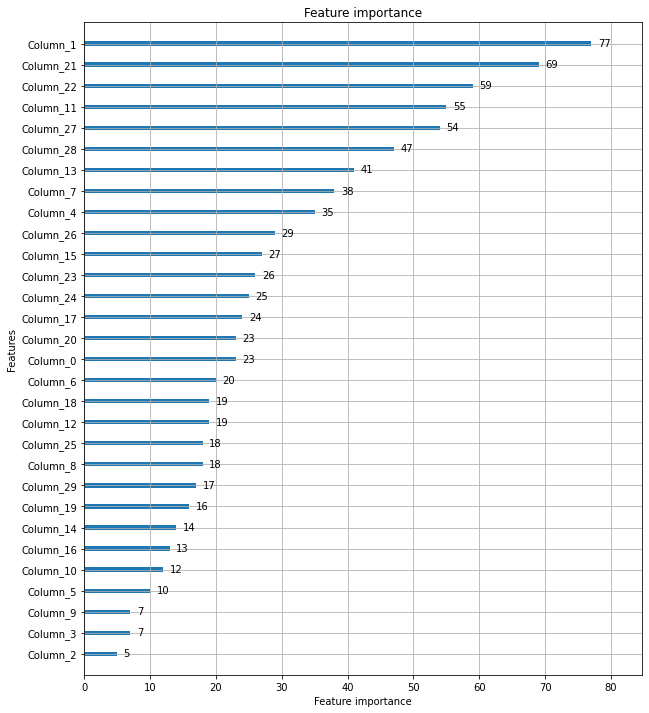

In [ ]:
# plot_importance( )를 이용해 피처 중요도 시각화
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(lgbm_wrapper, ax=ax)

lightgbm에 내장된 plot_importance() 역시 넘파이로 피처 데이터를 학습할 경우 피처명을 알 수 없기 Column_ 뒤에 피처 순서대로 숫자를 붙여서 X축에 나열한다.

# 8. 분류 실습 - 캐글 산탄데르 고객 만족 예측

산탄데르 고객 만족 예측 분석은 370개의 피처로 주어진 데이터 세트 기반에서 고객 만족 여부를 예측하는 것이다. 이를 XGBoost와 LightGBM을 활용해 예측하도록 한다.

클래스 레이블 명은 TARGET이며, 이 값이 1이면 불만을 가진 고객, 0이면 만족한 고객이다.

모델의 성능 평가는 ROC-AUC(ROC 곡선 영역)로 평가한다.

## 1) 데이터 전처리

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

cust_df = pd.read_csv("/content/drive/MyDrive/데이터분석/파이썬머신러닝완벽가이드/santander-customer-satisfaction/train_santander.csv", encoding='latin-1')
print('dataset shape:', cust_df.shape)
cust_df.head(3)

dataset shape: (76020, 371)


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,imp_sal_var16_ult1,ind_var1_0,ind_var1,ind_var2_0,ind_var2,ind_var5_0,ind_var5,ind_var6_0,ind_var6,ind_var8_0,ind_var8,ind_var12_0,ind_var12,ind_var13_0,ind_var13_corto_0,ind_var13_corto,ind_var13_largo_0,ind_var13_largo,ind_var13_medio_0,ind_var13_medio,ind_var13,...,saldo_medio_var5_ult1,saldo_medio_var5_ult3,saldo_medio_var8_hace2,saldo_medio_var8_hace3,saldo_medio_var8_ult1,saldo_medio_var8_ult3,saldo_medio_var12_hace2,saldo_medio_var12_hace3,saldo_medio_var12_ult1,saldo_medio_var12_ult3,saldo_medio_var13_corto_hace2,saldo_medio_var13_corto_hace3,saldo_medio_var13_corto_ult1,saldo_medio_var13_corto_ult3,saldo_medio_var13_largo_hace2,saldo_medio_var13_largo_hace3,saldo_medio_var13_largo_ult1,saldo_medio_var13_largo_ult3,saldo_medio_var13_medio_hace2,saldo_medio_var13_medio_hace3,saldo_medio_var13_medio_ult1,saldo_medio_var13_medio_ult3,saldo_medio_var17_hace2,saldo_medio_var17_hace3,saldo_medio_var17_ult1,saldo_medio_var17_ult3,saldo_medio_var29_hace2,saldo_medio_var29_hace3,saldo_medio_var29_ult1,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.17,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,1,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,300.0,122.22,300.0,240.75,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.03,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3.0,2.07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.77,0


In [ ]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [ ]:
print(cust_df['TARGET'].value_counts())
unsatisfied_cnt = cust_df[cust_df['TARGET'] == 1].TARGET.count()
total_cnt = cust_df.TARGET.count()
print('unsatisfied 비율은 {0:.2f}'.format((unsatisfied_cnt/total_cnt)))

0    73012
1     3008
Name: TARGET, dtype: int64
unsatisfied 비율은 0.04


In [ ]:
# describe( ) 메서드를 이용해 각 피처의 값 분포를 확인
cust_df.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,imp_sal_var16_ult1,ind_var1_0,ind_var1,ind_var2_0,ind_var2,ind_var5_0,ind_var5,ind_var6_0,ind_var6,ind_var8_0,ind_var8,ind_var12_0,ind_var12,ind_var13_0,ind_var13_corto_0,ind_var13_corto,ind_var13_largo_0,ind_var13_largo,ind_var13_medio_0,ind_var13_medio,ind_var13,...,saldo_medio_var5_ult1,saldo_medio_var5_ult3,saldo_medio_var8_hace2,saldo_medio_var8_hace3,saldo_medio_var8_ult1,saldo_medio_var8_ult3,saldo_medio_var12_hace2,saldo_medio_var12_hace3,saldo_medio_var12_ult1,saldo_medio_var12_ult3,saldo_medio_var13_corto_hace2,saldo_medio_var13_corto_hace3,saldo_medio_var13_corto_ult1,saldo_medio_var13_corto_ult3,saldo_medio_var13_largo_hace2,saldo_medio_var13_largo_hace3,saldo_medio_var13_largo_ult1,saldo_medio_var13_largo_ult3,saldo_medio_var13_medio_hace2,saldo_medio_var13_medio_hace3,saldo_medio_var13_medio_ult1,saldo_medio_var13_medio_ult3,saldo_medio_var17_hace2,saldo_medio_var17_hace3,saldo_medio_var17_ult1,saldo_medio_var17_ult3,saldo_medio_var29_hace2,saldo_medio_var29_hace3,saldo_medio_var29_ult1,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.0,76020.0,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000,7.602000e+04,7.602000e+04,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,7.602000e+04,76020.000000,76020.0,76020.000000,76020.000000,7.602000e+04,7.602000e+04,7.602000e+04,7.602000e+04,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,3.160715,68.803937,113.056934,68.205140,113.225058,137.242763,68.618087,113.792410,140.403479,5.477676,0.011458,0.003762,0.0,0.0,0.958024,0.663760,0.000105,0.000026,0.032833,0.028598,0.067522,0.045462,0.052249,0.042936,0.041476,0.010168,0.009997,0.000026,0.000026,0.050855,...,1077.256756,1048.856447,68.275452,9.505287,124.620962,110.026575,3.997023e+03,613.534443,5.703008e+03,4.401002e+03,3639.419939,556.184178,4852.261814,3857.848542,771.227449,162.170439,9.569502e+02,7.509563e+02,0.175324,0.0,0.513023,0.344174,9.117181e+01,3.646318e+01,1.310316e+02,1.092169e+02,0.213071,0.001910,0.253907,0.186630,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,95.268204,319.605516,512.154823,531.897917,950.086398,697.712596,535.473750,953.578624,712.767240,465.391149,0.106425,0.061221,0.0,0.0,0.200535,0.472425,0.010258,0.005129,0.178202,0.166674,0.250925,0.208316,0.222531,0.202714,0.199390,0.100325,0.099486,0.005129,0.005129,0.219703,...,9614.906985,8189.948852,1733.838226,519.389157,2205.249804,1935.305713,3.777314e+04,9292.752726,4.620254e+04,3.550718e+04,26359.174223,7182

var3 칼럼의 경우 min 값이 -999999인데 이는 NaN이나 특정 예외 값을 -999999로 변환했을 것이다. print(cust_df.var3.value_counts()[:10])로 var3의 값을 조사해 보면 -999999 값이 116개가 있음을 알 수 있다. var3은 숫자 형이고, 다른 값에 비해 -999999은 너무 편차가 심하므로 -999999를 가장 값이 많은 2로 변환한다.

ID 피처는 단순 식별자에 불과하므로 피처를 드롭한다. 그리고 클래스 데이터 세트와 피처 데이터 세트를 분리해 별도의 데이트 세트로 저장한다.

In [ ]:
cust_df['var3'].replace(-999999, 2, inplace=True)
cust_df.drop('ID', axis=1, inplace=True)

# 피처 세트와 레이블 세트 분리. 레이블 칼럼은 DataFrame의 맨 마지막에 위치해 칼럼 위치 -1로 분리
X_features = cust_df.iloc[:, :-1]
y_labels = cust_df.iloc[:, -1]
print('피처 데이터 shape:{0}'.format(X_features.shape))

피처 데이터 shape:(76020, 369)


학습과 성능 평가를 위해서 원본 데이터 세트에서 학습 데이터 세트와 테스트 데이터 세트를 분리한다. 비대칭한 데이터 세트이므로 클래스인 Target 값 분포도가 학습 데이터와 테스트 데이터 세트에 모두 비슷하게 추출됐는지 확인한다.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels, test_size=0.2, random_state=0)

train_cnt = y_train.count()
test_cnt = y_test.count()
print('학습 세트 Shape:{0}, 테스트 세트 Shape:{1}'.format(X_train.shape, X_test.shape))

print('학습 세트 레이블 값 분포 비율')
print(y_train.value_counts()/train_cnt)
print('\n 테스트 세트 레이블 값 분포 비율')
print(y_test.value_counts()/test_cnt)

학습 세트 Shape:(60816, 369), 테스트 세트 Shape:(15204, 369)
학습 세트 레이블 값 분포 비율
0    0.960964
1    0.039036
Name: TARGET, dtype: float64

 테스트 세트 레이블 값 분포 비율
0    0.9583
1    0.0417
Name: TARGET, dtype: float64


## 2) XGBoost 모델 학습과 하이퍼 파라미터 튜닝

먼저 XGBoost의 학습 모델을 생성하고 예측 결과를 ROC AUC로 평가해 보겠습니다. 사이킷런 래퍼인 XGBClassifier를 기반으로 학습을 수행합니다.

성능 평가 기준이 ROC-AUC이므로 XGBClassifier가 eval_metric은 'auc'로 한다.

성능 평가를 수행할 평가용 데이터 eval_set=[(X_train, y_train), (X_test, y_test)]으로 설정한다.

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

# n_estimators는 500으로, random state는 예제 수행 시마다 동일 예측 결과를 위해 설정.
xgb_clf = XGBClassifier(n_estimators=500, random_state=156)

# 성능 평가 지표를 auc로, 조기 중단 파라미터는 100으로 설정하고 학습 수행.
xgb_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric='auc', eval_set=[(X_train, y_train), (X_test, y_test)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:, 1], average='macro')
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

[0]	validation_0-auc:0.799928	validation_1-auc:0.803548
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 100 rounds.
[1]	validation_0-auc:0.802222	validation_1-auc:0.805222
[2]	validation_0-auc:0.80819	validation_1-auc:0.813162
[3]	validation_0-auc:0.8127	validation_1-auc:0.813243
[4]	validation_0-auc:0.81648	validation_1-auc:0.816979
[5]	validation_0-auc:0.816018	validation_1-auc:0.816629
[6]	validation_0-auc:0.816474	validation_1-auc:0.817776
[7]	validation_0-auc:0.818148	validation_1-auc:0.818464
[8]	validation_0-auc:0.81806	validation_1-auc:0.818295
[9]	validation_0-auc:0.817039	validation_1-auc:0.818087
[10]	validation_0-auc:0.818318	validation_1-auc:0.818749
[11]	validation_0-auc:0.818711	validation_1-auc:0.818521
[12]	validation_0-auc:0.818673	validation_1-auc:0.818516
[13]	validation_0-auc:0.819156	validation_1-auc:0.818998
[14]	validation_0-auc:0.819847	validation_1-auc:0.81999
[15

다음으로 XGBoost의 하이퍼 파라미터 튜닝을 수행해 보도록한다.


In [ ]:
from sklearn.model_selection import GridSearchCV

# 하이퍼 파라미터 테스트의 수행 속도를 향상시키기 위해 n_estimators를 100으로 감소
xgb_clf = XGBClassifier(n_estimators=100)

params = {'max_depth':[5, 7], 'min_child_weight':[1, 3], 'colsample_bytree':[0.5, 0,75]}

# cv는 3으로 지정
gridcv = GridSearchCV(xgb_clf, param_grid=params, cv=3)
gridcv.fit(X_train, y_train, early_stopping_rounds=30, eval_metric='auc',
           eval_set=[(X_train, y_train), (X_test, y_test)])

print('GridSearchCV 최적 파라미터:', gridcv.best_params_)

xgb_roc_score = roc_auc_score(y_test,gridcv.predict_proba(X_test)[:, 1], average='macro')
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

[0]	validation_0-auc:0.715421	validation_1-auc:0.722463
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.802772	validation_1-auc:0.807648
[2]	validation_0-auc:0.800147	validation_1-auc:0.804566
[3]	validation_0-auc:0.805692	validation_1-auc:0.809325
[4]	validation_0-auc:0.814807	validation_1-auc:0.816951
[5]	validation_0-auc:0.810346	validation_1-auc:0.812634
[6]	validation_0-auc:0.810623	validation_1-auc:0.814491
[7]	validation_0-auc:0.818556	validation_1-auc:0.820561
[8]	validation_0-auc:0.822006	validation_1-auc:0.823553
[9]	validation_0-auc:0.820433	validation_1-auc:0.821292
[10]	validation_0-auc:0.826212	validation_1-auc:0.825279
[11]	validation_0-auc:0.830077	validation_1-auc:0.827817
[12]	validation_0-auc:0.832328	validation_1-auc:0.828775
[13]	validation_0-auc:0.832008	validation_1-auc:0.827865
[14]	validation_0-auc:0.830319	validation_1-auc:0.82674

In [ ]:
# n_estimators는 1000으로 증가시키고, learning_rate=0.02로 감소, reg_alpha=0.03으로 추가함
xgb_clf = XGBClassifier(n_estimators=1000, random_state=156, learning_rate=0.02, max_depth=7, min_child_weight=1, colsample_bytree=0.75, reg_alpha=0.03)

# 성능 평가 지표를 auc로, 조기 중단 파라미터 값은 200으로 설정하고 학습 수행.
xgb_clf.fit(X_train, y_train, early_stopping_rounds=200,
            eval_metric='auc', eval_set=[(X_train, y_train), (X_test, y_test)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:, 1], average='macro')
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

[0]	validation_0-auc:0.82311	validation_1-auc:0.815226
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 200 rounds.
[1]	validation_0-auc:0.827094	validation_1-auc:0.816566
[2]	validation_0-auc:0.832027	validation_1-auc:0.820393
[3]	validation_0-auc:0.835873	validation_1-auc:0.825019
[4]	validation_0-auc:0.838197	validation_1-auc:0.826078
[5]	validation_0-auc:0.837948	validation_1-auc:0.827282
[6]	validation_0-auc:0.8381	validation_1-auc:0.826888
[7]	validation_0-auc:0.838475	validation_1-auc:0.827131
[8]	validation_0-auc:0.839775	validation_1-auc:0.828198
[9]	validation_0-auc:0.83981	validation_1-auc:0.827834
[10]	validation_0-auc:0.841664	validation_1-auc:0.828996
[11]	validation_0-auc:0.841069	validation_1-auc:0.82802
[12]	validation_0-auc:0.841167	validation_1-auc:0.828517
[13]	validation_0-auc:0.841455	validation_1-auc:0.828317
[14]	validation_0-auc:0.845308	validation_1-auc:0.834099
[1

튜닝된 모델에서 각 피처의 중요도 피처 중요도 그래프로 나타내도록 한다. xgboost 모듈의 plot_importance( ) 메서드를 이용한다.

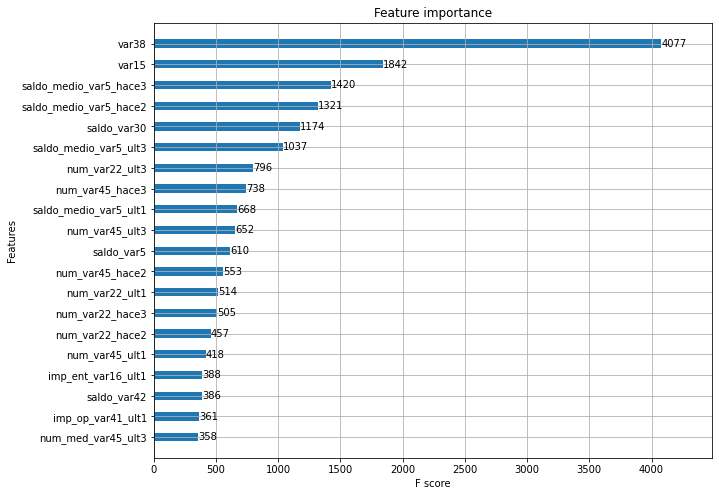

In [ ]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1, 1, figsize=(10, 8))
plot_importance(xgb_clf, ax=ax, max_num_features=20, height=0.4)

## 3) LightGBM 모델 학습과 하이퍼 파라미터 튜닝

In [ ]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=500)

evals = [(X_test, y_test)]
lgbm_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric='auc', eval_set=evals, verbose=True)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:, 1], average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

[1]	valid_0's binary_logloss: 0.165046	valid_0's auc: 0.817384
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's binary_logloss: 0.16	valid_0's auc: 0.81863
[3]	valid_0's binary_logloss: 0.156287	valid_0's auc: 0.827411
[4]	valid_0's binary_logloss: 0.153416	valid_0's auc: 0.832175
[5]	valid_0's binary_logloss: 0.151206	valid_0's auc: 0.83481
[6]	valid_0's binary_logloss: 0.149303	valid_0's auc: 0.834721
[7]	valid_0's binary_logloss: 0.147804	valid_0's auc: 0.83659
[8]	valid_0's binary_logloss: 0.146466	valid_0's auc: 0.837602
[9]	valid_0's binary_logloss: 0.145476	valid_0's auc: 0.838114
[10]	valid_0's binary_logloss: 0.144681	valid_0's auc: 0.838472
[11]	valid_0's binary_logloss: 0.143978	valid_0's auc: 0.83808
[12]	valid_0's binary_logloss: 0.14341	valid_0's auc: 0.837771
[13]	valid_0's binary_logloss: 0.142835	valid_0's auc: 0.838063
[14]	valid_0's binary_logloss: 0.142296	valid_0's auc: 0.838485
[15]	valid_0's binary_logloss: 0.141903	valid_0's auc: 0.83

GridSearchCV로 좀 더 다양한 하이퍼 파라미터에 대한 튜닝을 수행해 보겠습니다.

In [ ]:
from sklearn.model_selection import GridSearchCV

# 하이퍼 파라미터 테스트의 수행 속도를 향상시키기 위해 n_estimators를 200으로 감소
lgbm_clf = LGBMClassifier(n_estimators=200)

params = {'num_leaves': [32, 64],
          'max_depth': [128, 160],
          'min_child_samples':[60, 100],
          'subsample':[0.8, 1]}

# cv는 3으로 지정
gridcv = GridSearchCV(lgbm_clf, param_grid=params, cv=3)
gridcv.fit(X_train, y_train, early_stopping_rounds=30, eval_metric='auc',
           eval_set=[(X_train, y_train), (X_test, y_test)])

print('GridSearchCV 최적 파라미터:', gridcv.best_params_)
lgbm_roc_score = roc_auc_score(y_test, gridcv.predict_proba(X_test)[:, 1], average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

[1]	valid_0's binary_logloss: 0.156085	valid_0's auc: 0.820235	valid_1's binary_logloss: 0.164992	valid_1's auc: 0.81613
Training until validation scores don't improve for 30 rounds.
[2]	valid_0's binary_logloss: 0.150951	valid_0's auc: 0.825778	valid_1's binary_logloss: 0.159874	valid_1's auc: 0.821835
[3]	valid_0's binary_logloss: 0.147167	valid_0's auc: 0.832192	valid_1's binary_logloss: 0.156391	valid_1's auc: 0.827305
[4]	valid_0's binary_logloss: 0.144132	valid_0's auc: 0.837507	valid_1's binary_logloss: 0.15332	valid_1's auc: 0.8334
[5]	valid_0's binary_logloss: 0.141652	valid_0's auc: 0.842275	valid_1's binary_logloss: 0.150954	valid_1's auc: 0.836036
[6]	valid_0's binary_logloss: 0.139662	valid_0's auc: 0.844971	valid_1's binary_logloss: 0.149041	valid_1's auc: 0.838026
[7]	valid_0's binary_logloss: 0.138002	valid_0's auc: 0.846612	valid_1's binary_logloss: 0.147504	valid_1's auc: 0.837776
[8]	valid_0's binary_logloss: 0.136579	valid_0's auc: 0.848539	valid_1's binary_logloss:

해당 하이퍼 파라미터를 LightGBM에 적용하고 다시 학습해 ROC-AUC 측정 결과를 도출해 보겠습니다.

In [ ]:
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=32, subsample=0.8, min_child_samples=100, max_depth=128)

evals = [(X_test, y_test)]
lgbm_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric='auc', eval_set=evals, verbose=True)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:, 1], average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

[1]	valid_0's binary_logloss: 0.165016	valid_0's auc: 0.819488
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's binary_logloss: 0.159711	valid_0's auc: 0.822387
[3]	valid_0's binary_logloss: 0.156068	valid_0's auc: 0.829542
[4]	valid_0's binary_logloss: 0.153141	valid_0's auc: 0.834917
[5]	valid_0's binary_logloss: 0.150804	valid_0's auc: 0.837871
[6]	valid_0's binary_logloss: 0.148876	valid_0's auc: 0.839548
[7]	valid_0's binary_logloss: 0.147225	valid_0's auc: 0.841812
[8]	valid_0's binary_logloss: 0.14594	valid_0's auc: 0.842382
[9]	valid_0's binary_logloss: 0.144866	valid_0's auc: 0.842811
[10]	valid_0's binary_logloss: 0.143872	valid_0's auc: 0.843186
[11]	valid_0's binary_logloss: 0.14305	valid_0's auc: 0.843465
[12]	valid_0's binary_logloss: 0.142376	valid_0's auc: 0.843222
[13]	valid_0's binary_logloss: 0.141783	valid_0's auc: 0.843564
[14]	valid_0's binary_logloss: 0.141419	valid_0's auc: 0.843389
[15]	valid_0's binary_logloss: 0.141	valid_0's auc: 

# 9. 분류 실습 - 캐글 신용카드 사기 검출


해당 데이터 세트의 레이블인 Class 속성은 매우 불균형한 분포를 가지고 있다. Class는 0과 1로 분류되는데 0이 사기가 아닌 정상적인 신용카드 트랙잭션 데이터, 1은 신용카드 사기 트랙잭션을 의미한다. 전체 데이터의 약 0.172%만이 레이블 값이 1, 즉 사기 트랜잭션이다.

## 1) 언더 샘플링과 오버 샘플링의 이해

레이블이 불균형한 분포를 가진 데이터 세트를 학습시킬 때 예측 성능의 문제가 발생할 수 있는데, 이는 이상 레이블을 가지는 데이터 건수가 정상 레이블을 가진 데이터 건수에 비해 너무 적기 때문에 발생한다. 즉 이상 레이블을 가지는 데이터 건수는 매우 적기 때문에 제대로 다양한 유형을 학습하지 못하는 반면에 정상 레이블을 가지는 데이터 건수는 매우 많기 때문에 일방적으로 정상 레이블로 치우친 학습을 수행해 제대로 된 이상 데이터 검출이 어려워지기 쉽다

지도학습에서 극도로 불균형한 레이블 값 분포로 인한 문제점을 해결하기 위해서는 적절한 학습 데이터를 확보하는 방안이 필요한데, 대표적으로 오버 샘플링(Oversampling)과 언더 샘플링(Undersampling) 방법이 있으며, 오버 샘플링 방식이 예측 성능상 더 유리한 경우가 많아 주로 사용된다.

* **언더 샘플링**은 많은 데이터 세트를 적은 데이터 세트 수준으로 감소시키는 방식이다. 즉 정상 레이블을 가진 데이터가 10,000건, 이상 레이블을 가진 데이터가 100건이 있으면 정상 레이블 데이터를 100건으로 줄여 버리는 방식이다. 이렇게 정상 레이블 데이터를 이상 레이블 데이터 수준으로 줄여 버린 상태에서 학습을 수행하면 과도하게 정상 레이블로 학습/예측하는 부작용을 개선할 수 있지만, 너무 많은 정상 레이블 데이터를 감소시키기 때문에 정상 레이블의 경우 오히려 제대로 된 학습을 수행할 수 없다는 단점이 있어 잘 적용하지 않는 방법이다.

* **오버 샘플링**은 이상 데이터와 같이 적은 데이터 세트를 증식하여 학습을 위한 충분한 데이터를 확보하는 방법이다. 동일한 데이터를 단순히 증식하는 방법은 과적합(Overfitting)이 되기 때문에 의미가 없으므로 원본 데이터의 피처 값들을 아주 약간만 변경하여 증식한다. 대표적으로 SMOTE(Synthetic Minority Over-sampling Technique) 방법이 있다. **SMOTE**는 적은 데이터 세트에 있는 개별 데이터들의 K 최근접 이웃(K Nearest Neighbor)을 찾아서 이 데이터와 K개 이웃들의 차이를 일정 값으로 만들어서 기존 데이터와 약간 차이가 나는 새로운 데이터들을 생성하는 방법이다. 

## 2) 데이터 일차 가공 및 모델 학습/예측/평가

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

card_df = pd.read_csv('/content/drive/MyDrive/데이터분석/파이썬머신러닝완벽가이드/creditcard/creditcard.csv')
card_df.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


Time 피처의 경우 데이터 생성 관련한 작업용 속성으로서 큰 의미가 없기에 제거하겠습니다. Amount 피처는 신용카드 트랙잭션 금액을 의미하며, Class는 레이블로서 0의 경우 정상, 1의 경우 사기 트랜잭션이다.

In [ ]:
from sklearn.model_selection import train_test_split

# 인자로 입력받은 DataFrame을 복사한 뒤 Time 칼럼만 삭제하고 복사된 DataFrame 반환
def get_preprocessed_df(df=None):
  df_copy = df.copy()
  df_copy.drop('Time', axis=1, inplace=True)
  return df_copy

In [ ]:
# 사전 데이터 가공후 학습과 테스트 데이터 세트를 반환하는 함수
def get_train_test_dataset(df=None):
  # 인자로 입력된 DataFrame의 사전 데이터 가공이 완료된 복사 DataFrame 반환
  df_copy = get_preprocessed_df(df)
  # DataFrame의 맨 마지막 칼럼이 레이블, 나머지는 피처들
  X_features = df_copy.iloc[:, :-1]
  y_target = df_copy.iloc[:, -1]
  # train_test_split()으로 학습과 테스트 데이터 분할. stratify=y_target으로 Stratified 기반 분할
  X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.3, random_state=0, stratify=y_target)

  # 학습과 테스트 데이터 세트 반환
  return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

In [ ]:
# 학습 데이터 세트와 테스트 데이터 세트의 레이블 값 비율이 비슷하게 분할됐는지 확인한다.
print('학습 데이터 레이블 값 비율')
print(y_train.value_counts()/y_train.shape[0] * 100)
print('테스트 데이터 레이블 값 비율')
print(y_test.value_counts()/y_test.shape[0] * 100)

학습 데이터 레이블 값 비율
0    99.827451
1     0.172549
Name: Class, dtype: float64
테스트 데이터 레이블 값 비율
0    99.826785
1     0.173215
Name: Class, dtype: float64


로지스틱 회귀와 LightGBM 기반의 모델이 데이터 가공을 수행하면서 예측 성능이 어떻게 변하는지 살펴보도록 한다.

먼저 로지스틱 회귀를 이용해 신용 카드 사기 여부를 예측해본다.

In [ ]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
lr_pred_proba = lr_clf.predict_proba(X_test)[:, 1]

# 3장에서 사용한 get_clf_eval() 함수를 이용해 평가 수행.
get_clf_eval(y_test, lr_pred, lr_pred_proba)

오차 행렬
[[85280    15]
 [   55    93]]
정확도: 0.9992, 정밀도: 0.8611, 재현율: 0.628378, F1: 0.7266, AUC:0.9568


LightGBM을 이용한 모델을 만들어보기 앞서, 앞으로 수행할 예제 코드에서 반복적으로 모델을 변경해 학습/예측/평가하는 별도의 함수를 생성한다.

get_model_train_eval( )은 인자로 사이킷런의 Estimator 객체와 학습/테스트 데이터 세트를 입력 받아서 학습/예측/평가를 수행하는 역할을 하는 함수이다.

In [ ]:
# 인자로 사이킷런의 Estimator 객체와 학습/테스트 데이터 세트를 입력 받아서 학습/예측/평가 수행.
def get_model_train_eval(model, ftr_train=None, ftr_test=None, tgt_train=None, tgt_test=None):
  model.fit(ftr_train, tgt_train)
  pred = model.predict(ftr_test)
  pred_proba = model.predict_proba(ftr_test)[:, 1]
  get_clf_eval(tgt_test, pred, pred_proba)

먼저, 본 데이터 세트는 극도로 불균형한 레이블 값 분포도를 가지고 있으므로 LGBM Classifier 객체 생성 시 boost_from_average_False로 파라미터를 설정해야 한다.

레이블 값이 극도로 불균형한 분포를 이루는 경우 boost_from_average=True 설정은 재현율 및 ROC-AUC 성능을 매우 크게 저하시킨다.

LightGBM으로 모델을 학습한 뒤, 별도의 테스트 데이터 세트에서 예측 평가를 수행하도록 한다.

In [ ]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

오차 행렬
[[85289     6]
 [   36   112]]
정확도: 0.9995, 정밀도: 0.9492, 재현율: 0.756757, F1: 0.8421, AUC:0.9797


## 3) 데이터 분포도 변환 후 모델 학습/예측/평가

이번에는 왜곡된 분포도를 가지는 데이터를 재가공한 뒤에 모델을 다시 테스트해보도록 한다. 먼저 creditcard.csv의 중요 피처 값의 분포도를 살펴본다.

로지스틱 회귀는 선형 모델인데, 대부분의 선형 모델은 중요 피처들의 값이 정규 분포 형태를 유지하는 것을 선호한다.

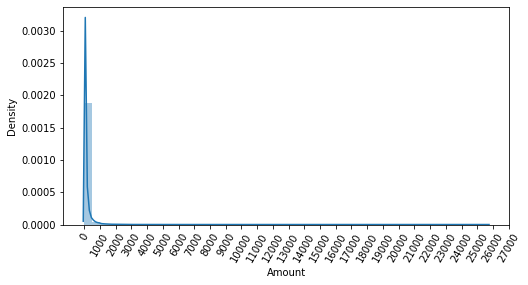

In [ ]:
import seaborn as sns
plt.figure(figsize=(8, 4))
plt.xticks(range(0, 30000, 1000), rotation=60)
sns.distplot(card_df['Amount'])

Amount를 표준 정규 분포 형태로 변환한 뒤에 로지스틱 회귀의 예측 성능을 측정하도록 한다. 이를 위해 앞에서 만든 get_preprocessed_df( ) 함수를 다음과 같이 사이킷런의 StandardScaler 클래스를 이용해 Amount 피처를 정규 분포 형태로 변환하는 코드로 변경한다.

In [ ]:
from sklearn.preprocessing import StandardScaler
# 사이킷런의 StandardScaler를 이용해 정규 분포 형태로 Amount 피처값 변환하는 로직으로 수정.
def get_preprocessed_df(df=None):
  df_copy = df.copy()
  scaler = StandardScaler()
  amount_n = scaler.fit_transform(df_copy['Amount'].values.reshape(-1, 1))
  # 변환된 Amount를 Amount_Scaled로 피처명 변경 후 DataFrame 맨 앞 칼럼으로 입력
  df_copy.insert(0, 'Amount_Scaled', amount_n)
  # 기존 Time, Amount 피처 삭제
  df_copy.drop(['Time', 'Amount'], axis=1, inplace=True)
  return df_copy


In [ ]:
# Amount를 정규 분포 형태로 변환 후 로지스틱 회귀 및 LightGBM 수행.
X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

print('### 로지스틱 회귀 예측 성능 ###')
lr_clf = LogisticRegression()
get_model_train_eval(lr_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

print('### LightGBM 예측 성능 ###')
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1)
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test= y_test)
# 근데 LightGBM 결과가 왜 이러지?

### 로지스틱 회귀 예측 성능 ###
오차 행렬
[[85281    14]
 [   58    90]]
정확도: 0.9992, 정밀도: 0.8654, 재현율: 0.608108, F1: 0.7143, AUC:0.9702
### LightGBM 예측 성능 ###
오차 행렬
[[85263    32]
 [  107    41]]
정확도: 0.9984, 정밀도: 0.5616, 재현율: 0.277027, F1: 0.3710, AUC:0.6383


이번에는 StandardScaler가 아니라 로그 변환을 수행하도록 한다. 로그 변환은 데이터 분포도가 심하게 왜곡되어 있을 경우 적용하는 중요 기법 중에 하나이다.

로그 변환은 넘파이의 log1p( ) 함수를 이용해 간단히 변환이 가능하다. 데이터 가공 함수인 get_preprocessed_df( )를 다음과 같이 로그 변환 로직으로 변경한다.

In [ ]:
def get_preprocessed_df(df=None):
  df_copy = df.copy()
  # 넘파이의 log1p( )를 이용해 Amount를 로그 변환
  amount_n = np.log1p(df_copy['Amount'])
  df_copy.insert(0, 'Amount_Scaled', amount_n)
  df_copy.drop(['Time', 'Amount'], axis=1, inplace=True)
  return df_copy

In [ ]:
# Amount 피처를 로그 변환 후 다시 로지스틱 회귀와 LightGBM 모델을 적용한 후 예측 성능 확인
X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

print('### 로지스틱 회귀 예측 성능 ###')
get_model_train_eval(lr_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

print('### LightGBM 예측 성능 ###')
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

### 로지스틱 회귀 예측 성능 ###
오차 행렬
[[85283    12]
 [   59    89]]
정확도: 0.9992, 정밀도: 0.8812, 재현율: 0.601351, F1: 0.7149, AUC:0.9727
### LightGBM 예측 성능 ###
오차 행렬
[[85266    29]
 [   65    83]]
정확도: 0.9989, 정밀도: 0.7411, 재현율: 0.560811, F1: 0.6385, AUC:0.7801


## 4) 이상치 데이터 제거 후 모델 학습/예측/평가

**이상치 데이터(Outlier)**는 전체 데이터의 패턴에서 벗어난 이상 값을 가진 데이터이며, 아웃라이어라고도 불린다. 이상치로 인해 머신러닝 모델의 성능에 영향을 받는 경우가 발생하기 쉽다. 이러한 이상치를 찾아내는 방법을 소개하고, 이들 데이터를 제거한 뒤 다시 모델을 평가해보도록 한다.

이상치를 찾는 방법은 여러 가지가 있지만, 이 중에서 IQR(Inter Quantile Range) 방식을 적용해 보겠습니다. IQR은 사분위(Qunatile) 값의 편차를 이용하는 기법으로 흔히 박스 플롯(Box Plot) 방식으로 시각화할 수 있다.

**사분위**는 전체 데이터를 값이 높은 순으로 정렬하고, 이를 1/4(25%)씩으로 구간을 분할하는 것을 지칭한다. 이 중 25% 구간인 Q1 ~ 75% 구간인 Q3의 범위를 IQR이라고 한다.

IQR을 이용해 이상치 데이터를 검출하는 방식은 보통 IQR에 1.5를 곱해서 생성된 범위를 이용해 최댓값과 최솟값을 결정한 뒤 최댓값을 초과하거나 최솟값에 미달하는 데이터를 이상치로 간주하는 것이다. 3/4 분위수(Q3)에서 IQR * 1.5를 더해서 일반적인 데이터가 가질 수 있는 최댓값으로 가정하고, 1/4 분위수(Q1)에 IQR * 1.5를 빼서 일반적인 데이터가 가질 수 있는 최솟값으로 가정한다.

이렇게 결정된 최댓값보다 큰 값 또는 최솟값보다 작은 값을 이상치 데이터로 간주한다. IQR 방식을 시각화한 도표가 박스 플롯이다.


이제 이상치 데이터를 IQR을 이용해 제거해 보도록 한다. 먼저 어떤 피처의 이상치 데이터를 검출할 것인지 선택이 필요하다. 매우 많은 피처가 있을 경우 이들 중 결정값(즉 레이블)과 가장 상관성이 높은 피처들을 위주로 이상치를 검출하는 것이 좋다.

DataFrame의 corr( )을 이용해 각 피처별로 상관도를 구한 뒤 시본의 heatmap을 통해 시각화해 보도록 한다.

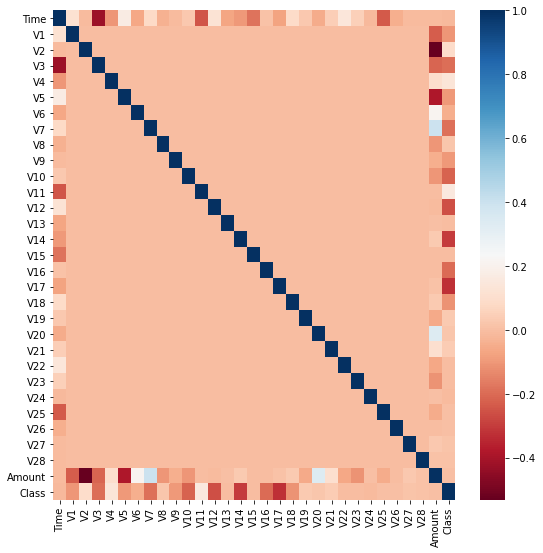

In [ ]:
import seaborn as sns

plt.figure(figsize=(9, 9))
corr = card_df.corr()
sns.heatmap(corr, cmap='RdBu')

상관관계 히트맵에서 cmap을 'RdBu'로 설정해 양의 상관관계가 높을수록 색깔이 진한 파란색에 가까우며, 음의 상관관계가 높을수록 색깔이 진한 빨간색에 가깝게 표현된다. 상관관계 히트맵에서 맨 아래에 위치한 결정 레이블인 Class 피처와 음의 상관관계가 가장 높은 피처는 V14와 V17이다. 이중 V14에 대해서만 이상치를 찾아서 제거해보도록 한다.

In [ ]:
import numpy as np

def get_outlier(df=None, column=None, weight=1.5):
  # fraud에 해당하는 column 데이터만 추출, 1/4 분위와 3/4 분위 지점을 np.percentile로 구함.
  fraud = df[df['Class']==1][column]
  quantile_25 = np.percentile(fraud.values, 25)
  quantile_75 = np.percentile(fraud.values, 75)

  # IQR을 구하고, IQR에 1.5를 곱해 최댓값과 최솟값 지점을 구함.
  iqr = quantile_75 - quantile_25
  iqr_weight = iqr * weight
  lowest_val = quantile_25 - iqr_weight
  highest_val = quantile_75 + iqr_weight

  # 최댓값보다 크거나, 최솟값보다 작은 값을 이상치 데이터로 설정하고 DataFrame index 반환.
  outlier_index = fraud[(fraud < lowest_val) | (fraud > highest_val)].index
  return outlier_index

In [ ]:
outlier_index = get_outlier(df=card_df, column='V14', weight=1.5)
print('이상치 데이터 인덱스:', outlier_index)

이상치 데이터 인덱스: Int64Index([8296, 8615, 9035, 9252], dtype='int64')


In [ ]:
# get_preprocessed_df( )를 로그 변환 후 V14 피처의 이상치 데이터를 삭제하는 로직으로 변경
def get_preprocessed_df(df=None):
  df_copy = df.copy()
  amount_n = np.log1p(df_copy['Amount'])
  df_copy.insert(0, 'Amount_Scaled', amount_n)
  df_copy.drop(['Time', 'Amount'], axis=1, inplace=True)

  # 이상치 데이터를 삭제하는 로직 추가
  outlier_index = get_outlier(df=df_copy, column='V14', weight=1.5)
  df_copy.drop(outlier_index, axis=0, inplace=True)
  return df_copy

X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)
print('### 로지스틱 회귀 예측 성능 ###')
get_model_train_eval(lr_clf,ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

print('### LightGBM 예측 성능 ###')
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

### 로지스틱 회귀 예측 성능 ###
오차 행렬
[[85281    14]
 [   48    98]]
정확도: 0.9993, 정밀도: 0.8750, 재현율: 0.671233, F1: 0.7597, AUC:0.9743
### LightGBM 예측 성능 ###
오차 행렬
[[85233    62]
 [  110    36]]
정확도: 0.9980, 정밀도: 0.3673, 재현율: 0.246575, F1: 0.2951, AUC:0.6229


## 5) SMOTE 오버 샘플링 적용 후 모델 학습/예측/평가

SMOTE 기법으로 오버 샘플링을 적용한 뒤 로지스틱 회귀와 LightGBM 모델의 예측 성능을 평가하도록 한다.

먼저 SMOTE는 imbalanced-learn 패키지의 SMOTE 클래스를 이용해 간단히 구현이 가능하다. SMOTE를 적용할 때는 반드시 학습 데이터 세트만 오버 샘플링을 해야 한다

앞 예제에서 생성한 학습 피처/레이블 데이터를 SMOTE 객체의 fit_sample( ) 메서드를 이용해 증식한 뒤 데이터를 증식 전과 비교해보도록 한다.

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=0)
X_train_over, y_train_over = smote.fit_sample(X_train, y_train)
print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트: ', X_train.shape, y_train.shape)
print('SMOTE 적용 후 학습용 피처/레이벌 데이터 세트: ', X_train_over.shape, y_train_over.shape)
print('SMOTE 적용 후 레이블 값 분포: \n', pd.Series(y_train_over).value_counts())

SMOTE 적용 전 학습용 피처/레이블 데이터 세트:  (199362, 29) (199362,)
SMOTE 적용 후 학습용 피처/레이벌 데이터 세트:  (398040, 29) (398040,)
SMOTE 적용 후 레이블 값 분포: 
 1    199020
0    199020
dtype: int64


이렇게 생성된 학습 데이터 세트를 기반으로 먼저 로지스틱 회귀 모델을 학습한 뒤 성능을 평가해보도록 한다.

In [ ]:
lr_clf = LogisticRegression()
# ftr_train과 tgt_train 인자값이 SMOTE 증식된 X_train_over와 y_train_over로 변경됨에 유의
get_model_train_eval(lr_clf, ftr_train=X_train_over, ftr_test=X_test, tgt_train=y_train_over, tgt_test=y_test)

오차 행렬
[[82937  2358]
 [   11   135]]
정확도: 0.9723, 정밀도: 0.0542, 재현율: 0.924658, F1: 0.1023, AUC:0.9737


정밀도가 5.4%로 급격하게 저하됐다. 이는 로지스틱 회귀 모델이 오버 샘플링으로 인해 실제 원본 데이터의 유형보다 너무 많은 Class=1 데이터를 학습하면서 실제 테스트 데이터 세트에서 예측을 지나치게 Class=1로 적용해 정밀도가 급격히 떨어지게 된 것이다.

분류 결정 임곗값에 따른 정밀도와 재현율 곡선을 통해 SMOTE로 학습된 로지스틱 회귀 모델에 어떠한 문제가 발생하고 있는지 시각적으로 확인해 보겠습니다. 이를 위해 3장에서 사용한 prprecision_recall_curve_plot

ecision_recall_curve_plot( ) 함수를 이용한다.

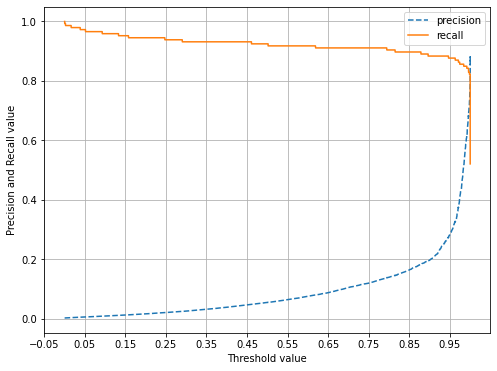

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.metrics import precision_recall_curve
%matplotlib inline

def precision_recall_curve_plot(y_test, pred_proba_c1):
  # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출.
  precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)

  # X축을 threshold 값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
  plt.figure(figsize=(8,6))
  threshold_boundary = thresholds.shape[0]
  plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
  plt.plot(thresholds, recalls[0:threshold_boundary], label='recall')

  # threshold 값 X 축의 Scale을 0.1 단위로 변경
  start, end = plt.xlim()
  plt.xticks(np.round(np.arange(start, end, 0.1), 2))

  # X축, Y축 label과 lend, 그리고 grid 설정
  plt.xlabel('Threshold value'); plt. ylabel('Precision and Recall value')
  plt.legend(); plt.grid()
  plt.show()


precision_recall_curve_plot(y_test, lr_clf.predict_proba(X_test)[:, 1])

임계값이 0.99 이하에서는 재현율이 매우 좋고 정밀도가 극단적으로 낮다가 0.99 이상에서는 반대로 재현율이 대폭 떨어지고 정밀도가 높아진다. 분류 결정 임계값을 조정하더라도 임계값의 민감도가 너무 심해 올바른 재현율/정밀도 성능을 얻을 수 없으므로 로지스틱 회귀 모델의 경우 SMOTE 적용 후 올바른 예측 모델이 생성되지 못했다.

이번에는 LightGBM 모델을 SMOTE로 오버 샘플링된 데이터 세트로 학습/예측/평가를 수행하도록한다.

In [ ]:
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train=X_train_over, ftr_test=X_test, tgt_train=y_train_over, tgt_test=y_test)

오차 행렬
[[85286     9]
 [   22   124]]
정확도: 0.9996, 정밀도: 0.9323, 재현율: 0.849315, F1: 0.8889, AUC:0.9789


SMOTE를 적용하면 재현율은 높아지나, 정밀도는 낮아지는 것이 일반적이다.

# 10. 스태킹 앙상블

**스태깅(Stacking)**은 개별적인 여러 알고리즘을 서로 결합해 예측 결과를 도출한다는 점에서 앞에 소개한 배깅(Bagging) 및 부스팅(Boosting)과 공통점을 가지고 있다. 하지만 가장 큰 차이점은 개별 알고리즘으로 예측한 데이터를 기반으로 다시 예측을 수행한다는 것이다. 즉, 개별 알고리즘의 예측 결과 데이터 세트를 최종적인 메타 데이터 세트로 만들어 별도의 ML 알고리즘으로 최종 학습을 수행하고 테스트 데이터를 기반으로 다시 최종 예측을 수행하는 방식이다.

스태킹 모델은 두 종류의 모델이 필요합니다. 첫 번째는 개별적인 기반 모델이고, 두 번째 이 개별 기반 모델의 예측 데이터를 학습 데이터로 만들어서 학습하는 최종 메타 모델이다. 스태깅 모델의 핵심은 여러 개별 모델의 예측 데이터를 각각 스태깅 형태로 결합해 최종 메타 모델의 학습용 피처 데이터 세트와 테스트용 피처 데이터 세트를 만드는 것이다.

즉 스태깅 모델은 여러 개의 모델에 대한 예측값을 합한 후, 즉 스태깅 형태로 쌓은 뒤 이에 대한 예측을 다시 수행하는 것이다.

## 1) 기본 스태깅 모델

기본 스태깅 모델을 위스콘신 암 데이터 세트에 적용해보도록 한다.

In [2]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer_data = load_breast_cancer()

X_data = cancer_data.data
y_label = cancer_data.target

X_train, X_test, y_train, y_test = train_test_split(X_data, y_label, test_size=0.2, random_state=0)

스태깅에 사용될 머신러닝 알고리즘 클래스를 생성한다. 개별 모델은 KNN, 랜덤 포레스트, 결정 트리, 에이다부스트이며, 이들 모델의 예측 결과를 합한 데이터 세트로 학습/예측하는 최종 모델은 로지스틱 회귀이다.

In [3]:
# 개별 ML 모델 생성

knn_clf = KNeighborsClassifier(n_neighbors=4)
rf_clf = RandomForestClassifier(n_estimators=100, random_state=0)
dt_clf = DecisionTreeClassifier()
ada_clf = AdaBoostClassifier(n_estimators=100)

# 스태깅으로 만들어진 데이터 세트를 학습, 예측할 최종 모델
lr_final = LogisticRegression(C=10)

In [5]:
# 개별 모델들을 학습.
knn_clf.fit(X_train, y_train)
rf_clf.fit(X_train, y_train)
dt_clf.fit(X_train, y_train)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=100, random_state=None)

In [7]:
# 학습된 개별 모델들이 각자 반환하는 예측 데이터 세트를 생성하고 개별 모델의 정확도 측정
knn_pred = knn_clf.predict(X_test)
rf_pred = rf_clf.predict(X_test)
dt_pred = dt_clf.predict(X_test)
ada_pred = ada_clf.predict(X_test)

print('KNN 정확도: {0:.4f}'.format(accuracy_score(y_test, knn_pred)))
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy_score(y_test, rf_pred)))
print('결정 트리 정확도: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))
print('에이다 부스트 정확도: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))

KNN 정확도: 0.9211
랜덤 포레스트 정확도: 0.9649
결정 트리 정확도: 0.8947
에이다 부스트 정확도: 0.8947


개별 알고리즘으로부터 예측된 예측값을 칼럼 레벨로 옆으로 붙여서 피처 값으로 만들어, 최종 메타 모델인 로지스틱 회귀에서 학습 데이터로 다시 사용한다.

반환된 예측 데이터 세트는 1차원 형태의 ndarray이므로 먼저 반환된 예측 결과를 행 형태로 붙인 뒤, 넘파이 transpose( )를 이용해 행과 열 위치를 바꾼 ndarray로 변환하면 된다.

In [9]:
pred = np.array([knn_pred, rf_pred, dt_pred, ada_pred])
print(pred.shape)

# transpose를 이용해 행과 열의 위치 교환. 칼럼 레벨로 각 알고리즘의 예측 결과를 피처로 만듦.
pred = np.transpose(pred)
print(pred.shape)

(4, 114)
(114, 4)


In [10]:
lr_final.fit(pred, y_test)
final = lr_final.predict(pred)

print('최종 메타 모델의 예측 정확도: {0:.4f}'.format(accuracy_score(y_test, final)))

최종 메타 모델의 예측 정확도: 0.9737


개별 모델의 예측 데이터를 스태깅으로 재구성해 최종 메타 모델에서 학습하고 예측한 결과, 정확도가 97.37%로 개별 모델 정확도보다 향상되었다. 하지만 이러한 스태깅 기법으로 예측을 한다고 무조건 개별 모델보다 좋아진다는 보장은 없다.

## 2) CV 세트 기반의 스태깅